# FIFA PLAYER'S OVERALL SKILL PREDICTION

**PROBLEM DEFINITION**

---

 **OVERVIEW**

The dataset contains the list of players along with certain attributes that affect their overall performance the goal is to provide a predictive model that uses these attributes as inputs, and outputs an overall rating.
Content
•	Every player featuring in FIFA 18
•	70+ attributes
•	Player and Flag Images
•	Playing Position Data
•	Attributes include on all player style statistics like Dribbling, Aggression, GK Skills etc.
•	Player personal data like Nationality, Photo, Club, Age, Wage, Salary etc



**PROBLEM STATEMENT**


The  FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in football, otherwise known as Soccer. Analyse the dataset with the players personal and performance attributes using different machine learning techniques and find the best one to predict the overall skill of players. Also find the best playing eleven. 



**DATASET LINK**

https://drive.google.com/file/d/1tJwhbMGC9BvSnsyWk4xqfG9Kkv7q_p4U/view?usp=sharing

# PREPROCESSING

In [ ]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import warnings
# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

warnings.filterwarnings("ignore")
# setting up the background style for the plots
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
data = pd.read_csv("/content/drive/My Drive/fifa.csv")
data

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

         Value   Wage  Special Preferred Foot  International Reputation  \
0      €110.5M  €565K     2202           Left                       5.0   
1         €77M  €405K     2228          Right                       5.0   
2      €118.5M  €290K     2143          Right                       5.0   
3         €72M  €260K     1471          Right                       4.0   
4        €102M  €355K     2281          Right                       4.0   
...        ...    ...      ...            ...                       ...   
18202     €60K    €1K     1307          Right                       1.0   
18203     €60K    €1K     1098          Right                       1.0   
18204     €60K    €1K     1189          Right                       1.0   
18205     €60K    €1K     1228          Right    

# EDA

In [ ]:
data.shape

(18207, 88)

In [ ]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDi

In [ ]:
data.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number      Crossing     Finishing  HeadingAccuracy  \
count   18147.000000  18159.000000  18159.000000     18159.000000   
mean       19.546096     49.734181     45.550911        52.298144   
std        15.947765     18.364524     19.525820        17.379909   
min         1.000000      5.000000      2.000000         4.000000   
25%         8.000000     38.000000     30.000000        44.000000   
50%        17.000000     54.000000     49.000000        56.000000   
75%        26.000000     64.000000     62.000000        64.000000   
max        99.000000     93.000000     95.000000        94.000000   

       ShortPassing       Volleys     Dribbling         Curve    FKAccuracy  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      58.686712     42.909026     55.371001     47.170824     42.863153   
std       14.699495     17.694408     18.910371     18.395264     17.478763   
min        7.000000      4.000000      4.000000      6.000000      3.000000   
25%       54.000000     30.000000     49.000000     34.000000     31.000000   
50%       62.000000     44.000000     61.000000     48.000000     41.000000   
75%       68.000000     57.000000     68.000000     62.000000     57.000000   
max       93.000000     90.000000     97.000000     94.000000     94.000000   

        LongPassing   BallControl  Acceleration   SprintSpeed       Agility  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      52.711933     58.369459     64.614076     64.726967     63.503607   
std       15.327870     16.686595     14.927780     14.649953     14.766049   
min        9.000000      5.000000     12.000000     12.000000     14.000000   
25%       43.000000     54.000000     57.000000     57.000000     55.000000   
50%       56.000000     63.000000     67.000000     67.000000     66.000000   
75%       64.000000     69.000000     75.000000     75.000000     74.000000   
max       93.000000     96.000000     97.000000     96.000000     96.000000   

          Reactions       Balance     ShotPower       Jumping       Stamina  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      61.836610     63.966573     55.460047     65.089432     63.219946   
std        9.010464     14.136166     17.237958     11.820044     15.894741   
min       21.000000     16.000000      2.000000     15.000000     12.000000   
25%       56.000000     56.000000     45.000000     58.000000     56.000000   
50%       62.000000     66.000000     59.000000     66.000000     66.00000

In [ ]:
data.corr()

Unnamed: 0        ID       Age   Overall  Potential  \
Unnamed: 0                  1.000000  0.415757 -0.454846 -0.972791  -0.633395   
ID                          0.415757  1.000000 -0.739208 -0.417025   0.047074   
Age                        -0.454846 -0.739208  1.000000  0.452350  -0.253312   
Overall                    -0.972791 -0.417025  0.452350  1.000000   0.660939   
Potential                  -0.633395  0.047074 -0.253312  0.660939   1.000000   
Special                    -0.596508 -0.231352  0.236695  0.606960   0.383727   
International Reputation   -0.413322 -0.356191  0.253765  0.499491   0.372993   
Weak Foot                  -0.204026 -0.075784  0.059867  0.212015   0.162346   
Skill Moves                -0.415672 -0.056914  0.027649  0.414463   0.354290   
Jersey Number               0.213645  0.182074 -0.241156 -0.218931  -0.010474   
Crossing                   -0.390062 -0.131994  0.130545  0.394972   0.246319   
Finishing                  -0.325529 -0.082323  0.068660  0.332515   0.243355   
HeadingAccuracy            -0.337766 -0.106815  0.147183  0.340776   0.200988   
ShortPassing               -0.492495 -0.136279  0.132894  0.502550   0.369189   
Volleys                    -0.384285 -0.159915  0.142472  0.391338   0.254906   
Dribbling                  -0.364106 -0.030340  0.010166  0.372426   0.315019   
Curve                      -0.416378 -0.169511  0.143276  0.419491   0.279944   
FKAccuracy                 -0.395433 -0.199549  0.193467  0.396892   0.230544   
LongPassing                -0.477500 -0.186764  0.181310  0.483909   0.321437   
BallControl                -0.449655 -0.100184  0.084969  0.460197   0.354396   
Acceleration               -0.185030  0.133236 -0.158667  0.196869   0.234608   
SprintSpeed                -0.198797  0.132437 -0.151682  0.210647   0.236771   
Agility                    -0.256270 -0.019897 -0.019395  0.264952   0.222310   
Reactions                  -0.832156 -0.408617  0.453124  0.850045   0.513425   
Balance                    -0.097160  0.048463 -0.089877  0.103160   0.138025   
ShotPower                  -0.440023 -0.166133  0.156947  0.441118   0.288318   
Jumping                    -0.261581 -0.169369  0.177167  0.264435   0.109151   
Stamina                    -0.358451 -0.053895  0.097793  0.365656   0.202563   
Strength                   -0.342839 -0.259756  0.332798  0.349326   0.075769   
LongShots                  -0.417853 -0.161549  0.155096  0.420795   0.266740   
Aggression                 -0.397067 -0.228329  0.265190  0.395470   0.171174   
Interceptions              -0.319162 -0.160602  0.197845  0.321326   0.154908   
Positioning                -0.351820 -0.088330  0.082443  0.356493   0.245616   
Vision                     -0.490296 -0.215170  0.187422  0.498894   0.348141   
Penalties                  -0.337899 -0.140657  0.139535  0.341429   0.224281   
Composure                  -0.716173 -0.384473  0.391023  0.727655   0.440008   
Marking                    -0.280829 -0.110198  0.142817  0.286505   0.162801   
StandingTackle             -0.248564 -0.085929  0.119745  0.252629   0.143564   
SlidingTackle              -0.220034 -0.068409  0.103089  0.222811   0.128980   
GKDiving                    0.027757 -0.105594  0.101277 -0.025937  -0.053446   
GKHandling                  0.027026 -0.111149  0.106419 -0.025062  -0.054672   
GKKicking                   0.030654 -0.106652  0.104964 -0.029372  -0.059061   
GKPositioning               0.019842 -0.118250  0.116402 -0.017674  -0.052589   
GKReflexes                  0.025610 -0.105778  0.103313 -0.023276  -0.053341   

                           Special  International Reputation  Weak Foot  \
Unnamed: 0               -0.596508                 -0.413322  -0.204026   
ID                       -0.231352                 -0.356191  -0.075784   
Age                       0.236695                  0.253765   0.059867   
Overall                   0.606960                  0.499491   0.212015   
Poten

In [ ]:
#missing values
pd.set_option('max_rows', 100)
data.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [ ]:
data.duplicated().sum()

0

# cleaning


In [ ]:
data=data.drop(data.columns[0],axis=1)
data=data.drop("ID",axis=1)
data=data.drop("Photo",axis=1)
data=data.drop("Flag",axis=1)
data=data.drop("Club Logo",axis=1)
data.head()

Name  Age Nationality  Overall  Potential  \
0           L. Messi   31   Argentina       94         94   
1  Cristiano Ronaldo   33    Portugal       94         94   
2          Neymar Jr   26      Brazil       92         93   
3             De Gea   27       Spain       91         93   
4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value   Wage  Special Preferred Foot  \
0         FC Barcelona  €110.5M  €565K     2202           Left   
1             Juventus     €77M  €405K     2228          Right   
2  Paris Saint-Germain  €118.5M  €290K     2143          Right   
3    Manchester United     €72M  €260K     1471          Right   
4      Manchester City    €102M  €355K     2281          Right   

   International Reputation  Weak Foot  Skill Moves       Work Rate  \
0                       5.0        4.0          4.0  Medium/ Medium   
1                       5.0        4.0          5.0       High/ Low   
2                       5.0        5.0          5.0    High/ Medium   
3                       4.0        3.0          1.0  Medium/ Medium   
4                       4.0        5.0          4.0      High/ High   

    Body Type Position  Jersey Number     Joined Loaned From  \
0       Messi       RF           10.0   1-Jul-04         NaN   
1  C. Ronaldo       ST            7.0  10-Jul-18         NaN   
2      Neymar       LW           10.0   3-Aug-17         NaN   
3        Lean       GK            1.0   1-Jul-11         NaN   
4      Normal      RCM            7.0  30-Aug-15         NaN   

  Contract Valid Until Height  Weight    LS    ST    RS    LW    LF    CF  \
0                 2021    5'7  159lbs  88+2  88+2  88+2  92+2  93+2  93+2   
1                 2022    6'2  183lbs  91+3  91+3  91+3  89+3  90+3  90+3   
2                 2022    5'9  150lbs  84+3  84+3  84+3  89+3  89+3  89+3   
3                 2020    6'4  168lbs   NaN   NaN   NaN   NaN   NaN   NaN   
4                 2023   5'11  154lbs  82+3  82+3  82+3  87+3  87+3  87+3   

     RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM  \
0  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2  64+2  61+2   
1  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3   
2  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3  81+3  88+3  65+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3  87+3  88+3  77+3  77+3   

    CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  \
0  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0       95.0   
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3      84.0       94.0   
2  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3      79.0       87.0   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      17.0       13.0   
4  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3      93.0       82.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
3             21.0          50.0     13.0       18.0   21.0        19.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
3         51.0         42.0          57.0         58.0     60.0       90.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0 

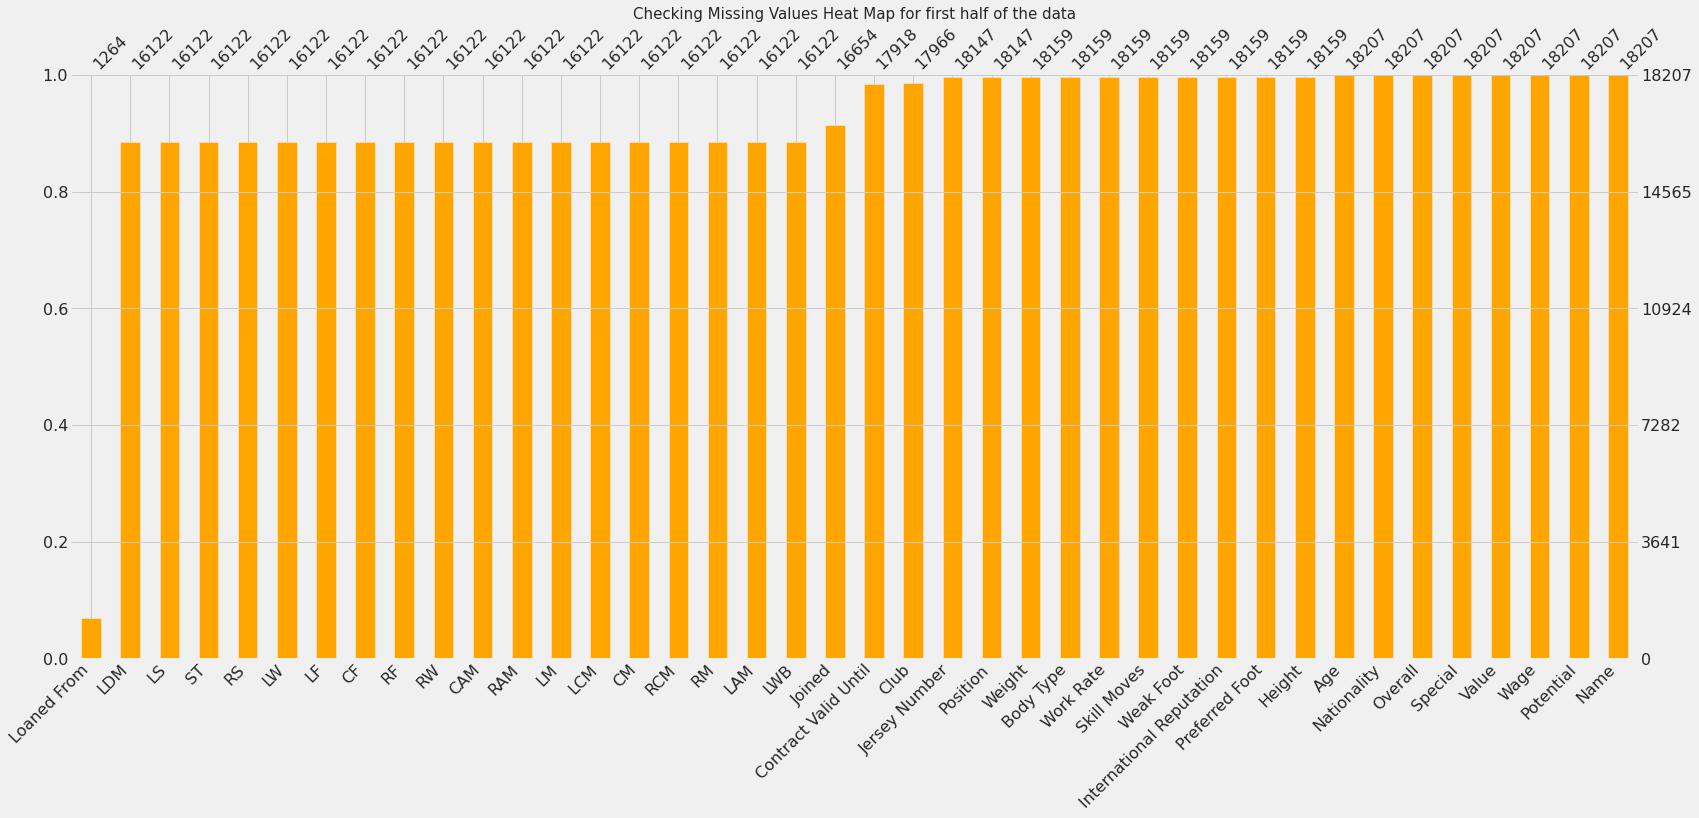

In [ ]:
# checking if the data contains any NULL value
# Visualize missing values as a matrix 
mno.bar(data.iloc[:, :40],
        color = 'orange',
        sort = 'ascending') 
plt.title('Checking Missing Values Heat Map for first half of the data', fontsize = 15)
plt.show()

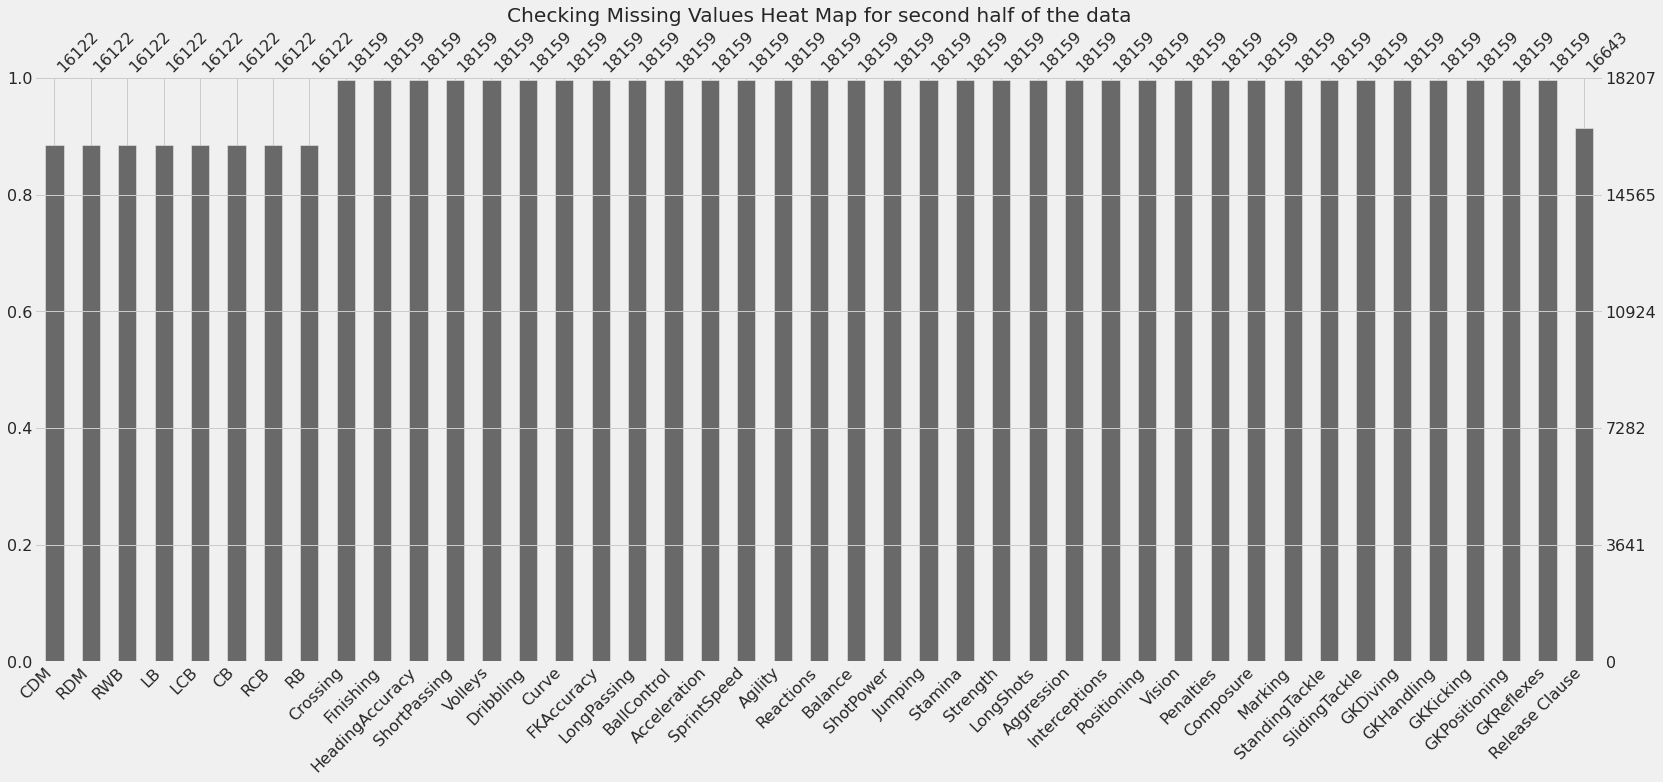

In [ ]:
mno.bar(data.iloc[:, 40:]) 
plt.title('Checking Missing Values Heat Map for second half of the data')
plt.show()


In [ ]:
data['Weight'].mode()

0    165lbs
dtype: object

In [ ]:
data['International Reputation'].mode()

0    1.0
dtype: float64

In [ ]:
data['Jersey Number'].mode()

0    8.0
dtype: float64

In [ ]:
data['Body Type'].mode()

0    Normal
dtype: object

In [ ]:
#missing value imputation
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)

data['Weight'].fillna('165lbs', inplace = True)
data['Contract Valid Until'].fillna("2023", inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna("Jul 1, 2018", inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(data['Weak Foot'].median(), inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna('1', inplace = True)
data['Wage'].fillna(data['Wage'].mode(), inplace = True)


In [ ]:
pd.set_option('max_rows', 100)
data.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Position                       0
Jersey Number                  0
Joined                         0
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF                          2085
CF                          2085
RF                          2085
RW                          2085
LAM       

In [ ]:
# impute with 0 for rest of the columns
data.fillna(0, inplace = True)

 
data.isnull().sum().sum() 

0

# FEATURE ENGINEERING

In [ ]:
 # creating new features by aggregating the features

def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [ ]:
 # adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

In [ ]:
data.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning',

# VISUALIZATION

# DISTPLOT
A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.

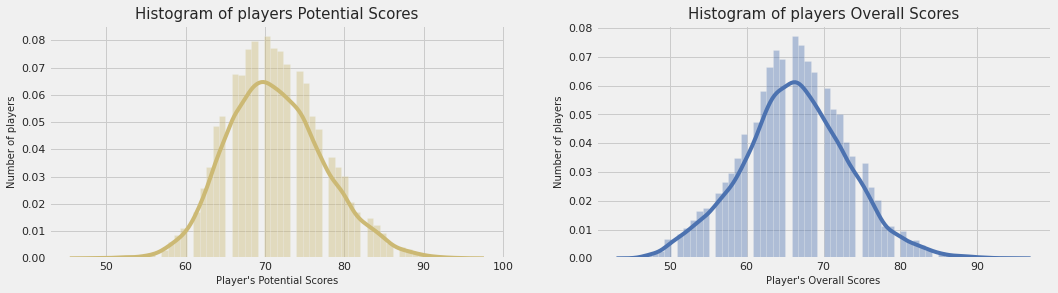

In [ ]:
# To show Different potential scores of the players participating in the FIFA  

plt.figure(figsize=(16, 4))
 #plt.style.use('seaborn-paper')

plt.subplot(1, 2, 1)
x = data.Potential
ax = sns.distplot(x, bins = 58,   color = 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 15)

plt.subplot(1, 2, 2)
y = data.Overall
ax = sns.distplot(y, bins = 58,  color = 'b')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 15)
plt.show() 

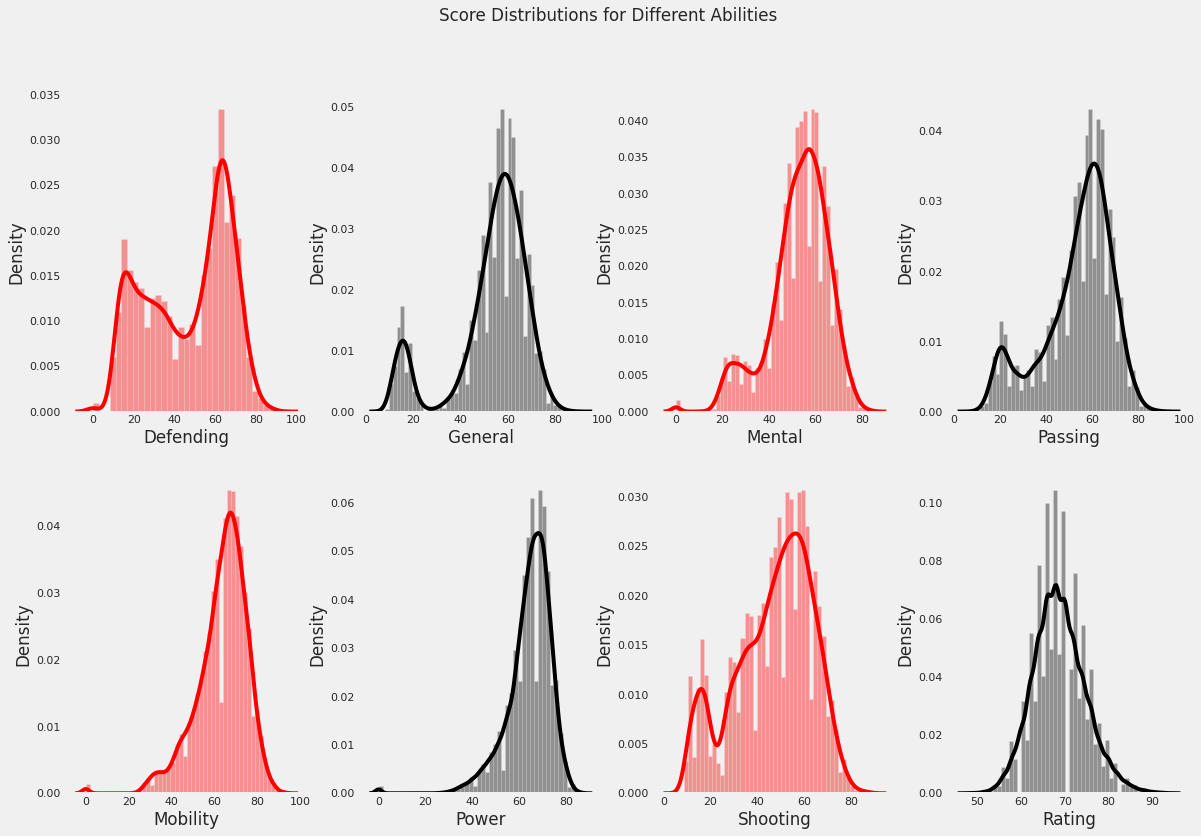

In [ ]:
# lets check the Distribution of Scores of Different Skills

plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(data['Defending'], color = 'red')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['General'], color = 'black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['Mental'], color = 'red')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['Passing'], color = 'black')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['Mobility'], color = 'red')
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['Power'], color = 'black')
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['Shooting'], color = 'red')
plt.grid()

plt.subplot(2, 4, 8)
sns.distplot(data['Rating'], color = 'black')
plt.grid()

plt.suptitle('Score Distributions for Different Abilities')
plt.show()


In [ ]:
# extract a subset of the data from a DataFrame to display multiple columns, rows
df= data[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power',
       'Rating', 'Shooting']]

In [ ]:
df['Club'].value_counts()

No Club                      241
FC Barcelona                  33
Burnley                       33
AS Monaco                     33
Everton                       33
                            ... 
América FC (Minas Gerais)     20
Fluminense                    20
Sligo Rovers                  19
Limerick FC                   19
Derry City                    18
Name: Club, Length: 652, dtype: int64

In [ ]:
df_c=data.groupby(['Club']).count()
df_c.head()

Name  Age  Nationality  Overall  Potential  Value  \
Club                                                                       
 SSV Jahn Regensburg     29   29           29       29         29     29   
1. FC Heidenheim 1846    28   28           28       28         28     28   
1. FC Kaiserslautern     26   26           26       26         26     26   
1. FC Köln               28   28           28       28         28     28   
1. FC Magdeburg          26   26           26       26         26     26   

                       Wage  Special  Preferred Foot  \
Club                                                   
 SSV Jahn Regensburg     29       29              29   
1. FC Heidenheim 1846    28       28              28   
1. FC Kaiserslautern     26       26              26   
1. FC Köln               28       28              28   
1. FC Magdeburg          26       26              26   

                       International Reputation  Weak Foot  Skill Moves  \
Club                                                                      
 SSV Jahn Regensburg                         29         29           29   
1. FC Heidenheim 1846                        28         28           28   
1. FC Kaiserslautern                         26         26           26   
1. FC Köln                                   28         28           28   
1. FC Magdeburg                              26         26           26   

                       Work Rate  Body Type  Position  Jersey Number  Joined  \
Club                                                                           
 SSV Jahn Regensburg          29         29        29             29      29   
1. FC Heidenheim 1846         28         28        28             28      28   
1. FC Kaiserslautern          26         26        26             26      26   
1. FC Köln                    28         28        28             28      28   
1. FC Magdeburg               26         26        26             26      26   

                       Loaned From  Contract Valid Until  Height  Weight  LS  \
Club                                                                           
 SSV Jahn Regensburg            29                    29      29      29  29   
1. FC Heidenheim 1846           28                    28      28      28  28   
1. FC Kaiserslautern            26                    26      26      26  26   
1. FC Köln                      28                    28      28      28  28   
1. FC Magdeburg                 26                    26      26      26  26   

                       ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  \
Club                                                                            
 SSV Jahn Regensburg   29  29  29  29  29  29  29   29   29   29  29   29  29   
1. FC Heidenheim 1846  28  28  28  28  28  28  28   28   28   28  28   28  28   
1. FC Kaiserslautern   26  26  26  26  26  26  26   26   26   26  26   26  26   
1. FC Köln             28  28  28  28  28  28  28   28   28   28  28   28  28   
1. FC Magdeburg        26  26  26  26  26  26  26   26   26   26  26   26  26   

                       RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  \
Club                                                                            
 SSV Jahn Regensburg    29  29   29   29   29   29   29  29   29  29   29  29   
1. FC Heidenheim 1846   28  28   28   28   28   28   28  28   28  28   28  28   
1. FC Kaiserslautern    26  26   26   26   26   26   26  26   26  26   26  26   
1. FC Köln              28  28   28   28   28   28   28  28   28  28   28  28   
1. FC Magdeburg         26  26   26   26   26   26   26  26   26  26   26  26   

                       Crossing  Finishing  HeadingAccuracy  ShortPassing  \
Club                                                                        
 SSV Jahn Regensburg         29         29               29            29   
1. FC Heidenheim 1846        28         28               28            28   
1. FC

In [ ]:
# defining a function for cleaning the wage column

def extract_value_from(column):
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in column:
        out = float(out.replace('K', ''))*1000
    return float(out)
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))


In [ ]:
data.groupby("Club")["Wage"].mean().sort_values(ascending=False).head(10)

Club
Real Madrid          152030.303030
FC Barcelona         146575.757576
Juventus             131680.000000
Manchester City      113363.636364
Manchester United    102757.575758
Chelsea               98454.545455
Liverpool             87939.393939
Tottenham Hotspur     79484.848485
FC Bayern München     78827.586207
Arsenal               78424.242424
Name: Wage, dtype: float64

In [ ]:
data.groupby("Nationality").Name.count().sort_values(ascending=False).head(10)

Nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Name, dtype: int64

# COUNTPLOT
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

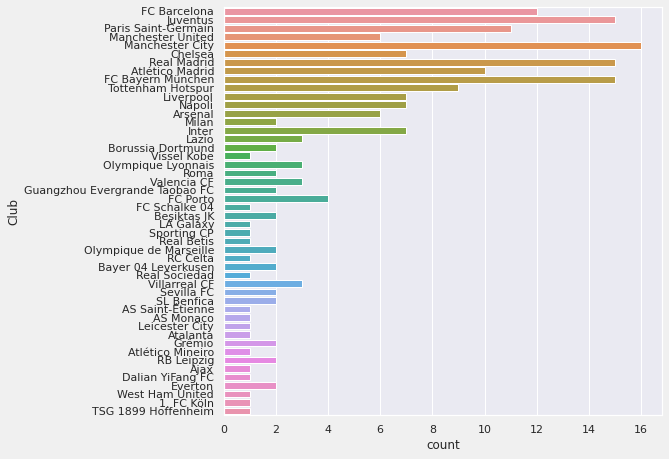

In [ ]:
df_c=data.head(100)
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
ax = sns.countplot(y="Club", data=df.head(200))


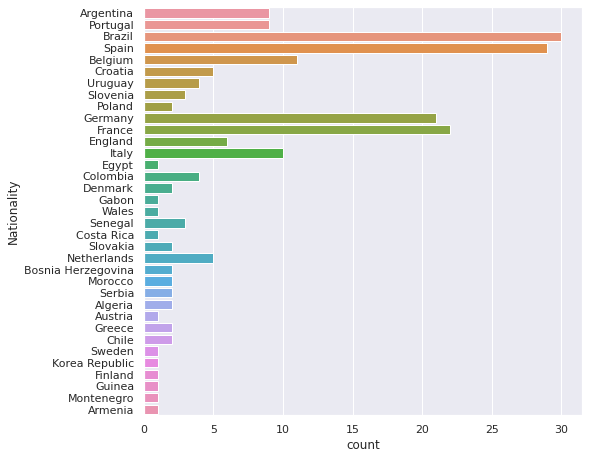

In [ ]:
#country wise count of players
df_p=data.head(100)
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
ax = sns.countplot(y="Nationality", data=df.head(200))

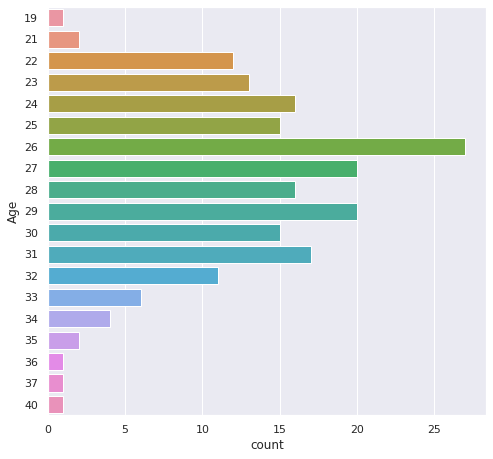

In [ ]:
#age
df_a=data.head(100)
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
ax = sns.countplot(y="Age", data=df.head(200))

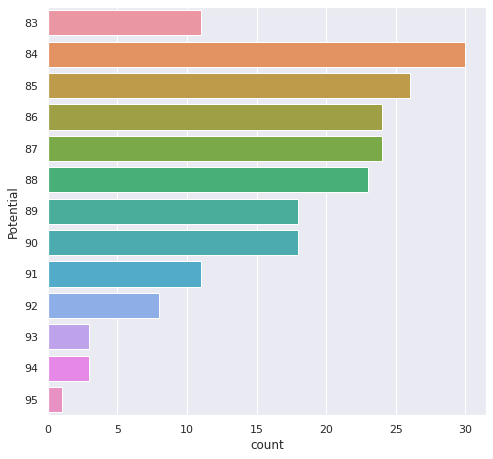

In [ ]:
#Potential
df_l=data.head(100)
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
ax = sns.countplot(y="Potential", data=df.head(200))


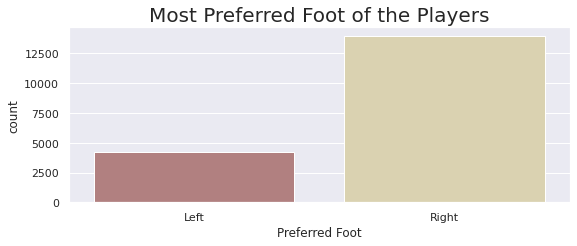

In [ ]:
# comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (8, 3)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

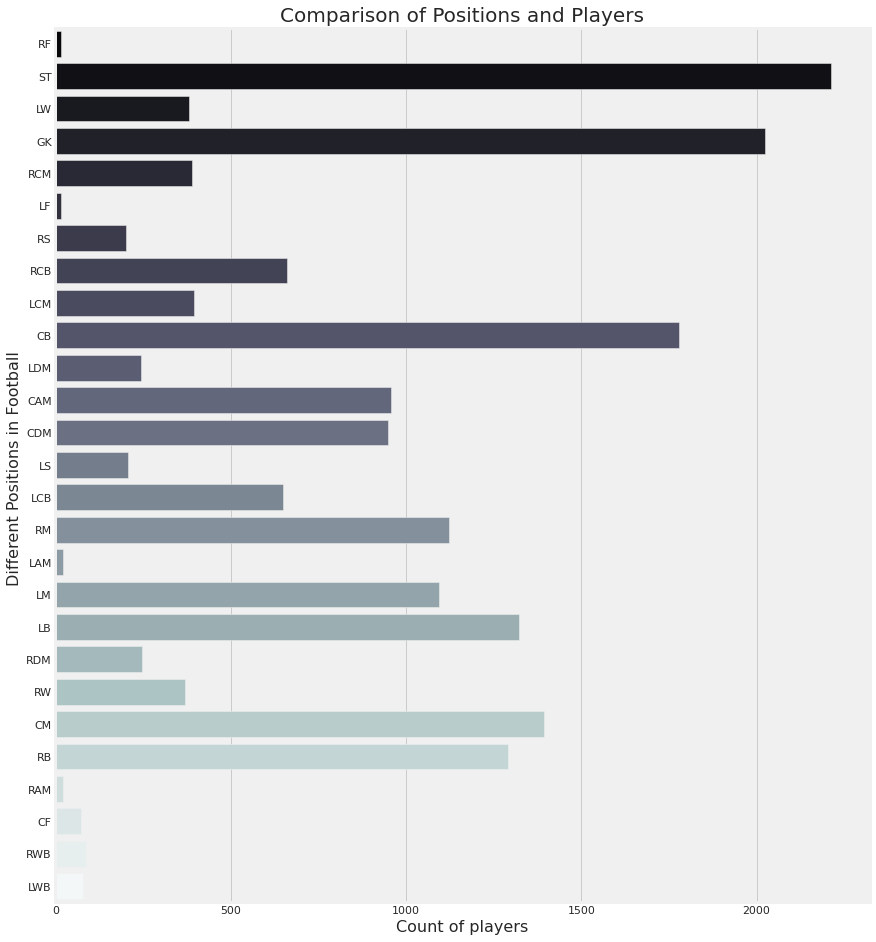

In [ ]:
# different positions acquired by the players 

plt.figure(figsize = (13, 15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y = 'Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Count of players', fontsize = 16)
ax.set_ylabel(ylabel = 'Different Positions in Football ', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

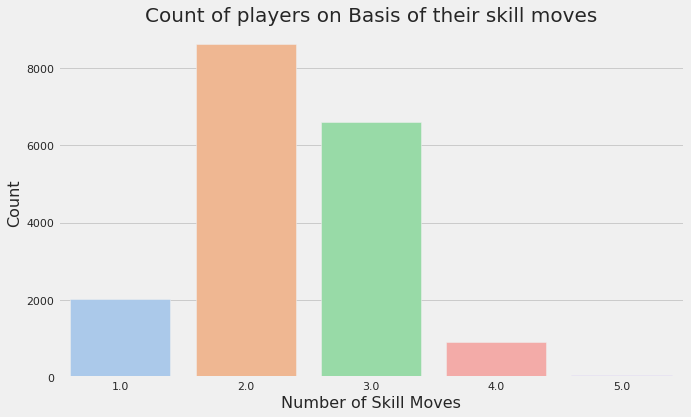

In [ ]:
# Skill Moves of Players

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

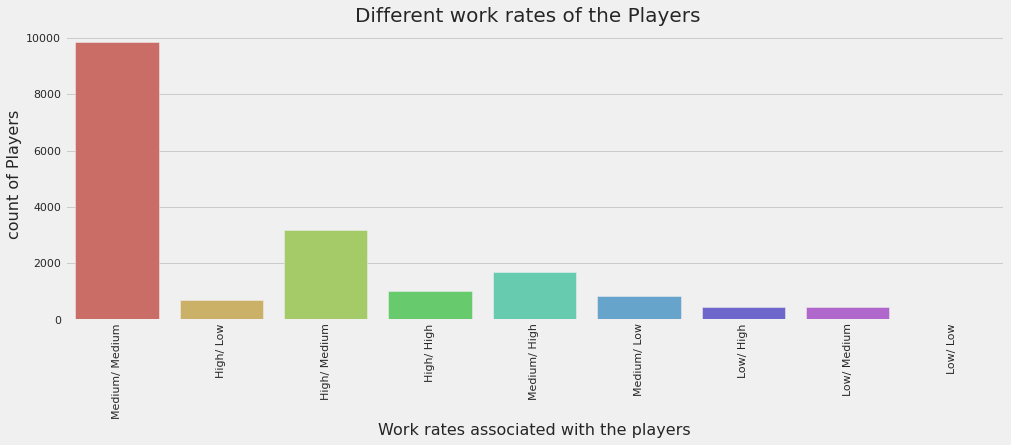

In [ ]:
# To show Different Work rate of the players participating  

plt.figure(figsize = (15, 5))
plt.style.use('fivethirtyeight')

sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players  ', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

# CATPLOTS
catplot shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables.

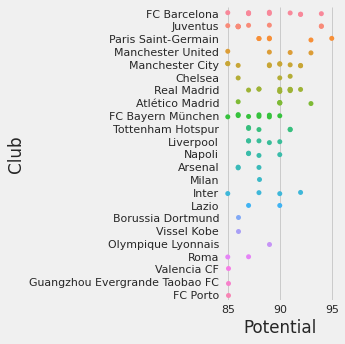

In [ ]:
# Categoriacal plots
sns.catplot(x="Potential", y="Club", kind='strip',data=df_p[:100]);

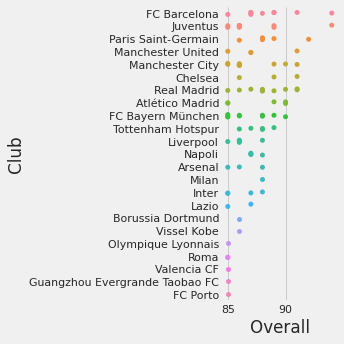

In [ ]:
sns.catplot(x="Overall", y="Club", kind='strip',data=df_p[:100]);

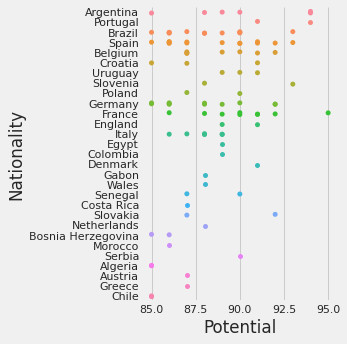

In [ ]:
sns.catplot(x="Potential", y="Nationality", kind='strip',data=df_p[:100]);

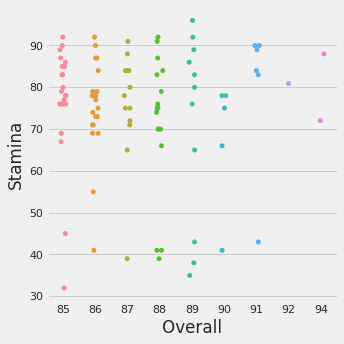

In [ ]:
sns.catplot(x="Overall", y="Stamina", kind='strip',data=df_p[:100]);

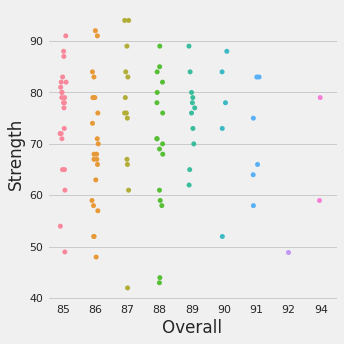

In [ ]:
sns.catplot(x="Overall", y="Strength", kind='strip',data=df_p[:100]);

# FACETGRID
This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

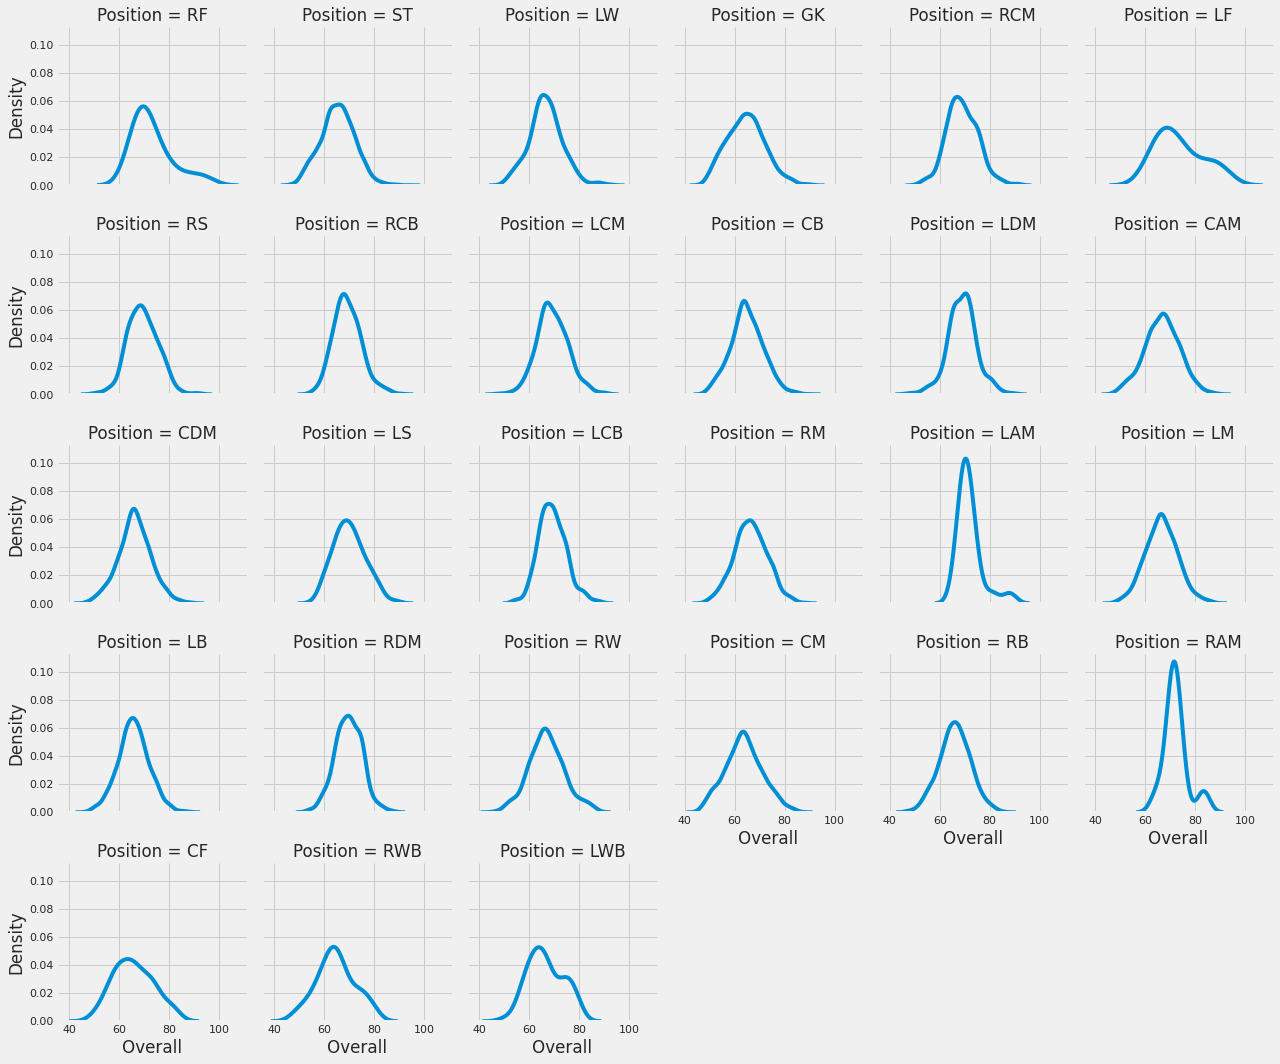

In [ ]:
#  FacetGrid
g = sns.FacetGrid(data, col="Position", col_wrap=6 )
g.map(sns.kdeplot, "Overall")

# PAIRPLOT
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.

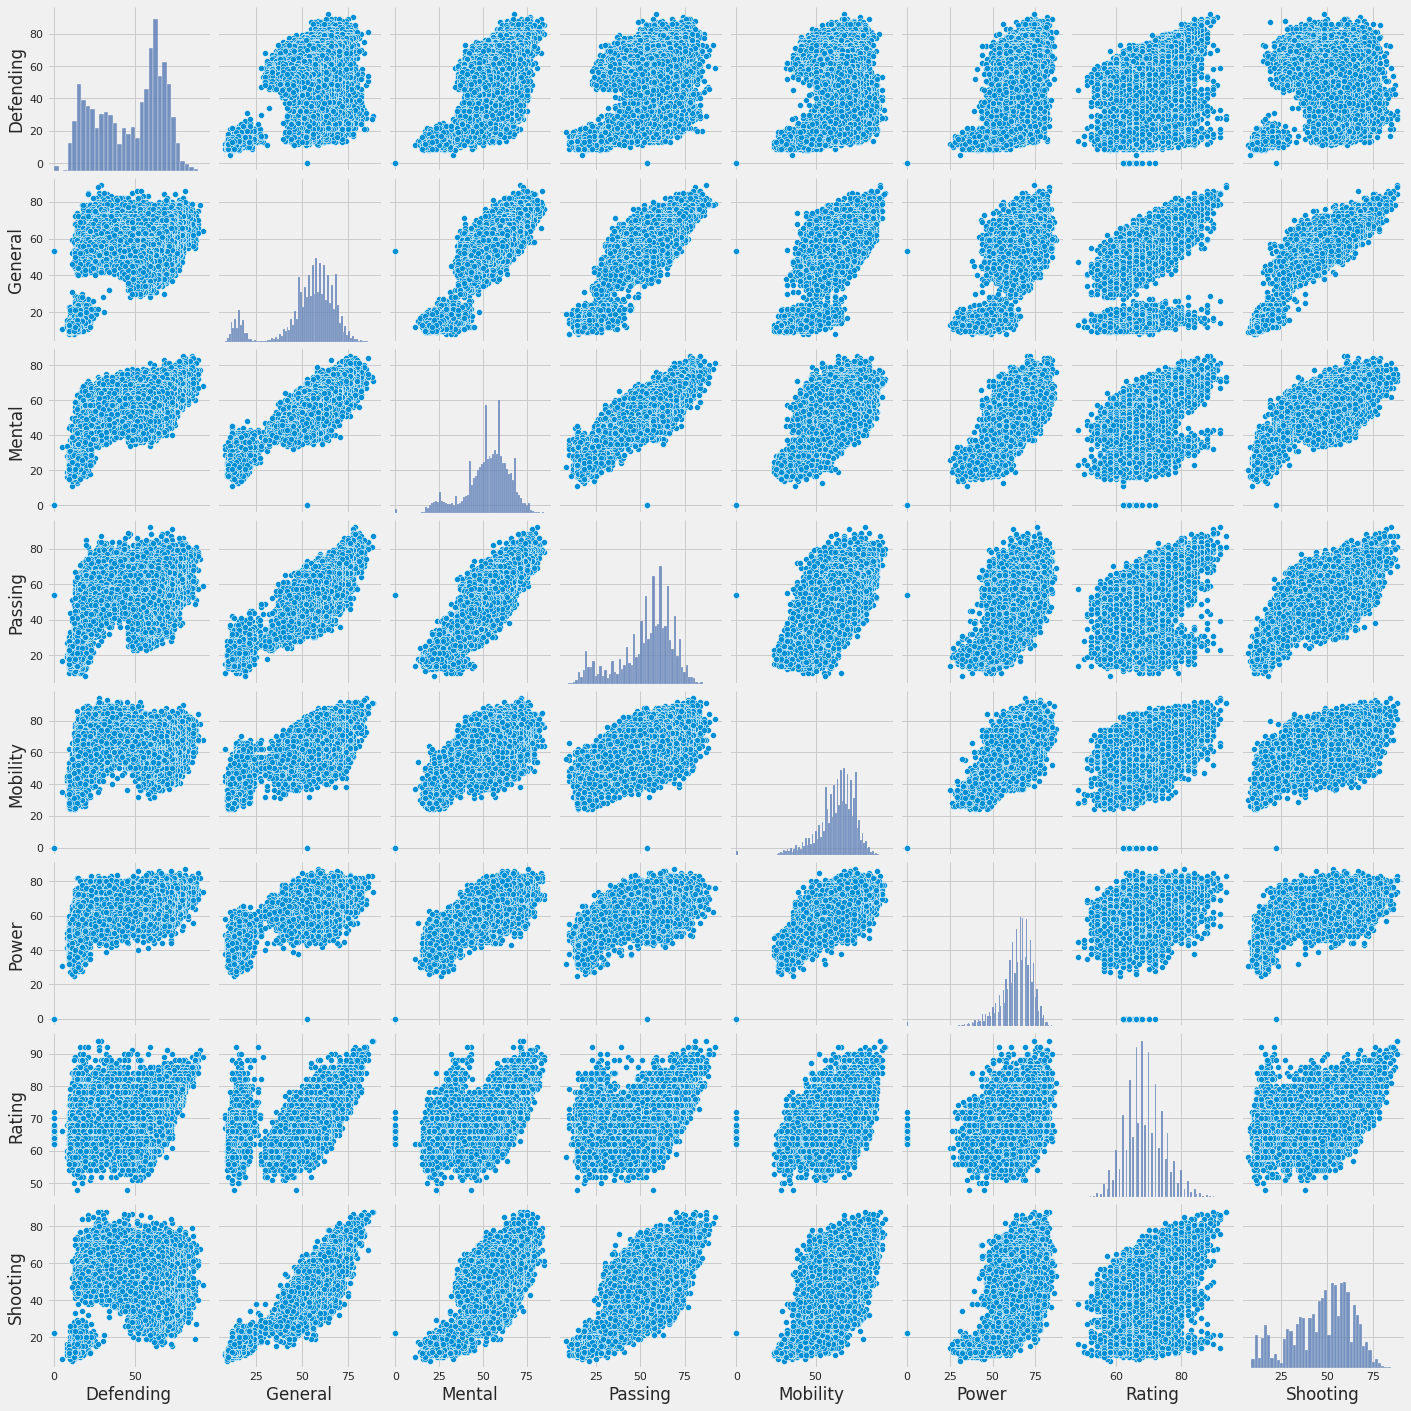

In [ ]:
#pair plot
sns.pairplot(df[['Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power','Rating', 'Shooting']])

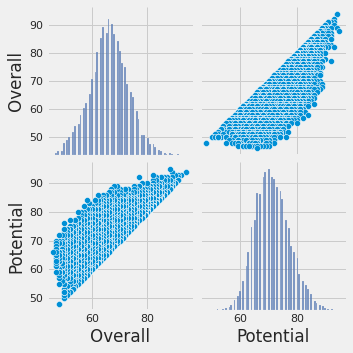

In [ ]:
sns.pairplot(data[['Overall', 'Potential', 'Value']])  

# HEATMAP
A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

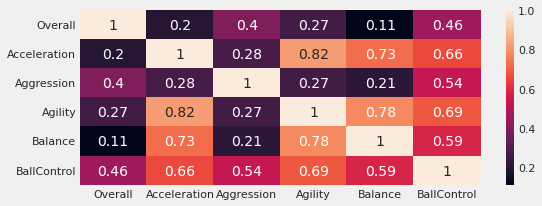

In [ ]:
#heatmap

sns.heatmap(df[['Overall','Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl']].corr(), annot=True)

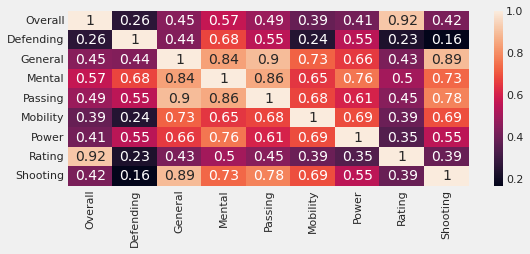

In [ ]:
sns.heatmap(df[['Overall','Defending','General','Mental','Passing','Mobility',
                'Power','Rating','Shooting']].corr(),annot=True)

In [ ]:
columns=df[[ 'Position','Crossing','Age','Overall',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 
       'SprintSpeed', 'Reactions',  'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power',
       'Rating', 'Shooting']]
correlation=columns.corr()


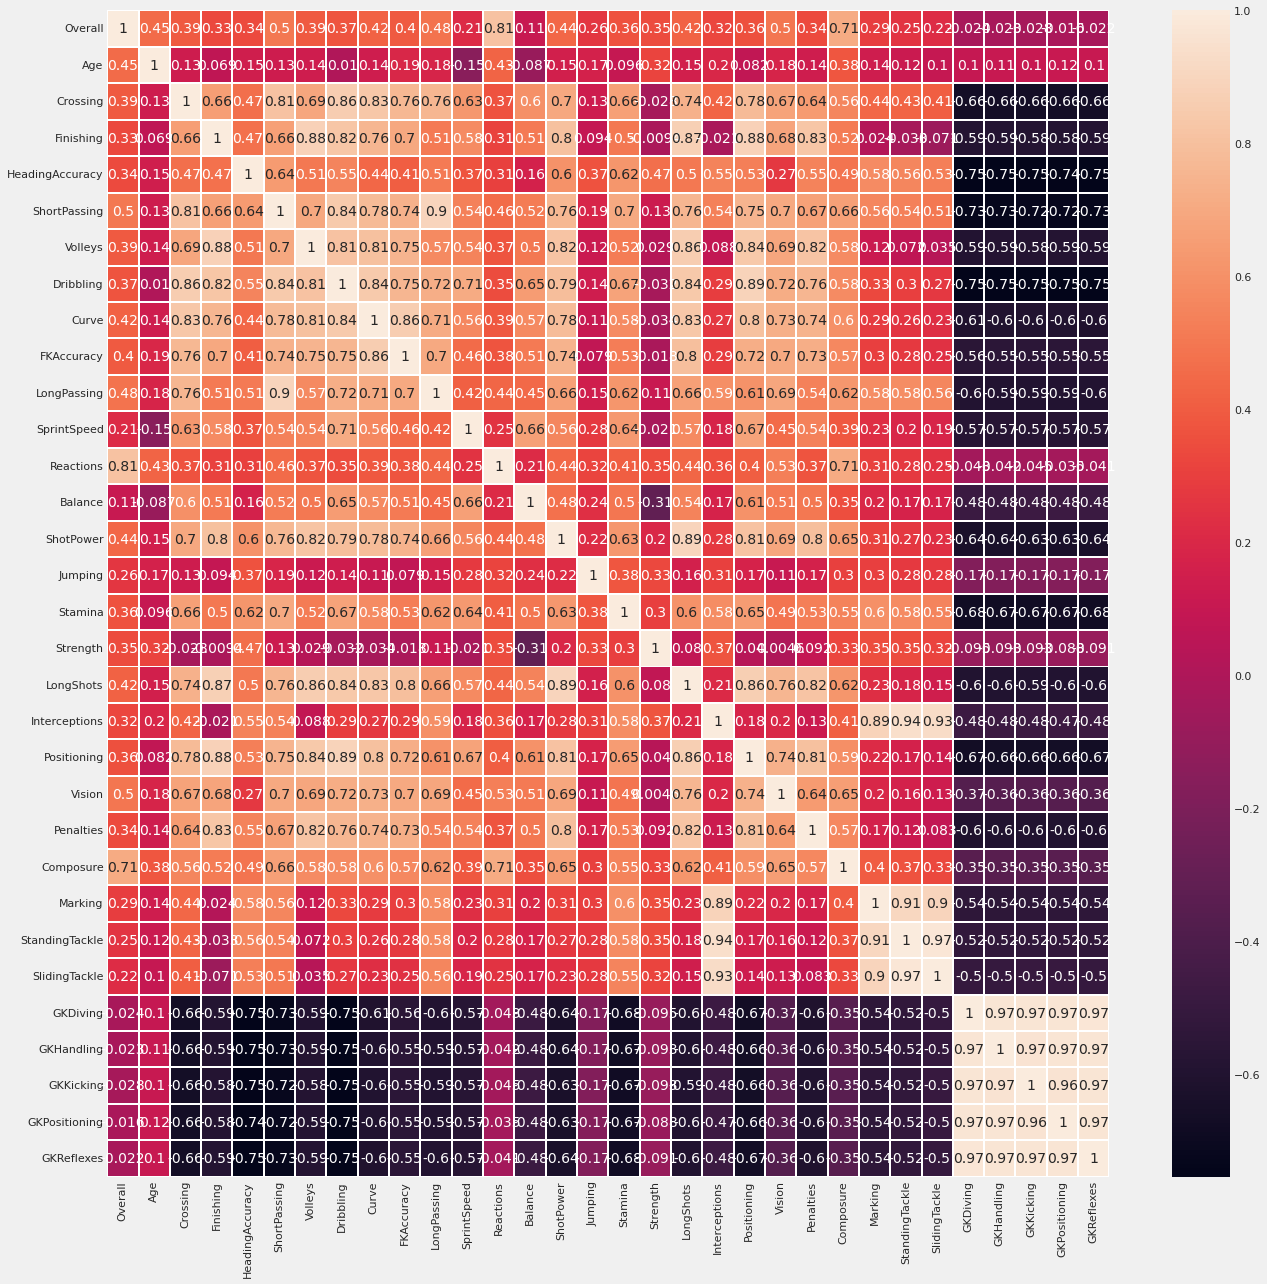

In [ ]:
 
# explore correlations across all skills
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(df[['Overall','Age','Position','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 
       'SprintSpeed',  'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']].corr(), annot=True, linewidths=1, ax=ax)

In [ ]:
# explore correlations to overall and age
pd.set_option('max_columns', 100)
correlation = correlation.loc[['Overall','Age']]
correlation.sort_values('Overall',ascending=False)

Crossing      Age  Overall  Finishing  HeadingAccuracy  ShortPassing  \
Overall  0.394776  0.45235  1.00000   0.332349         0.340606      0.502300   
Age      0.130391  1.00000  0.45235   0.068578         0.147009      0.132737   

          Volleys  Dribbling     Curve  FKAccuracy  LongPassing  SprintSpeed  \
Overall  0.391143   0.372241  0.419282    0.396695     0.483668     0.212304   
Age      0.142304   0.010154  0.143106    0.193238     0.181095    -0.147450   

         Reactions  ShotPower   Jumping   Stamina  Strength  LongShots  \
Overall   0.811810   0.440144  0.262914  0.364395  0.345469   0.421238   
Age       0.427307   0.154884  0.170647  0.095971  0.321495   0.153873   

         Aggression  Interceptions  Positioning    Vision  Penalties  \
Overall    0.395130       0.322663     0.357389  0.495537   0.341984   
Age        0.261554       0.196452     0.081819  0.184036   0.137857   

         Composure   Marking  StandingTackle  SlidingTackle  GKDiving  \
Overall   0.711350  0.288075        0.254448       0.224815 -0.024374   
Age       0.378028  0.141761        0.118997       0.102495  0.101104   

         GKHandling  GKKicking  GKPositioning  GKReflexes  Defending  \
Overall   -0.023450  -0.027729      -0.016088   -0.021732   0.261304   
Age        0.106229   0.104774       0.116189    0.103137   0.123488   

          General    Mental   Passing  Mobility     Power    Rating  Shooting  
Overall  0.448457  0.567775  0.486130  0.385804  0.408843  0.920892  0.422394  
Age      0.107223  0.272758  0.156967 -0.016741  0.176440  0.132008  0.153216

In [ ]:
#conclusion
#The top 2 attributes most highly correlated with overall skill are Reactions and Composure. 

In [ ]:
data[data['International Reputation'] == 5][['Name','Nationality',
                            'Overall']].sort_values(by = 'Overall',
                                     ascending = False).style.background_gradient(cmap = 'magma')

# PIECHART
A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice is proportional to the quantity it represents.

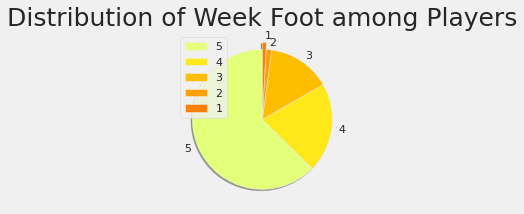

In [ ]:
 # plotting a pie chart to represent the share of week foot players

labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()

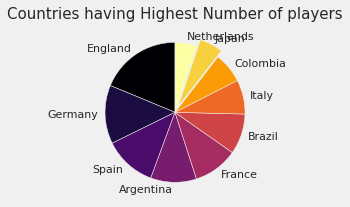

In [ ]:
# picking up the countries with highest number of players to compare their overall scores

data['Nationality'].value_counts().head(10).plot(kind = 'pie', cmap = 'inferno',
                                        startangle = 90, explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0])
plt.title('Countries having Highest Number of players', fontsize = 15)
plt.axis('off')
plt.show()

In [ ]:
# defining a function for cleaning the Weight data

def extract_value_from(value):
  out = value.replace('lbs', '')
  return float(out)

# applying the function to weight column
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

# BARPLOT
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

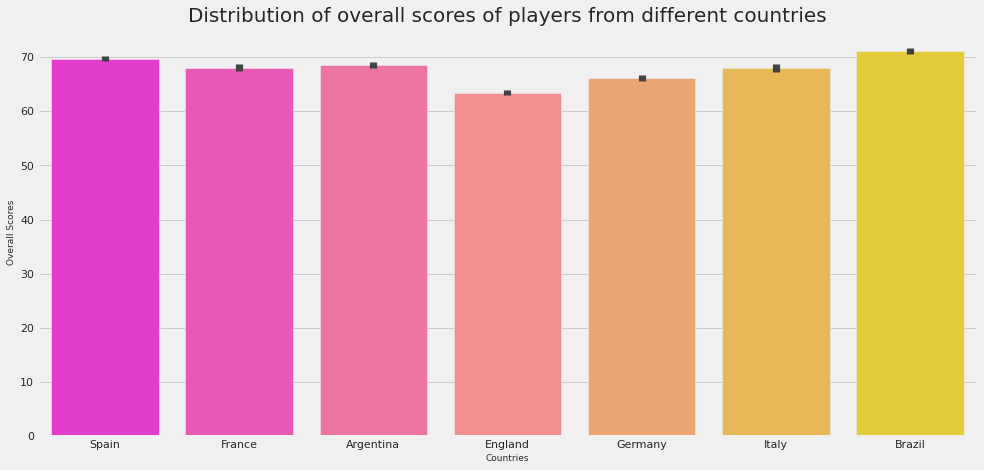

In [ ]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

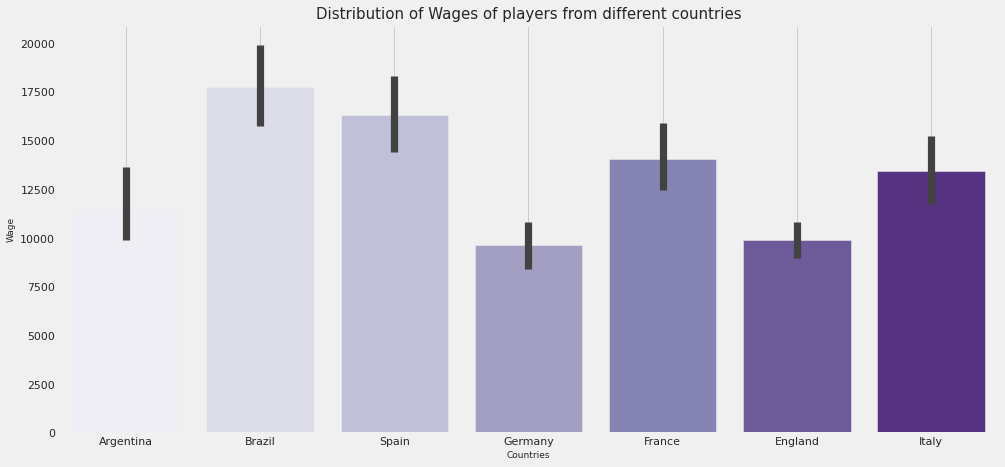

In [ ]:
# Every Nations' Player and their wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.grid()
plt.show()

# BOXPLOT
In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

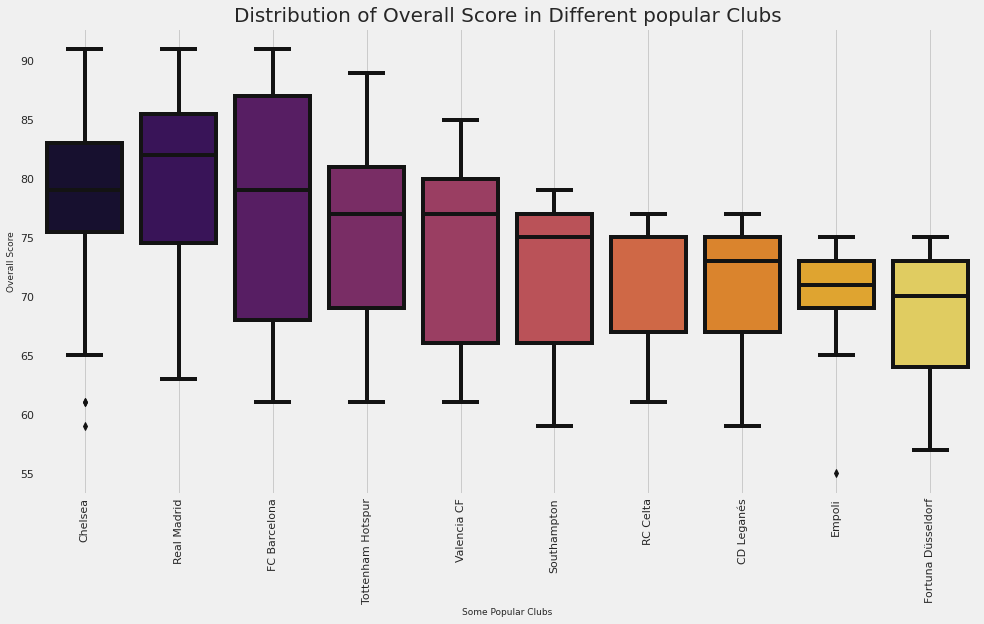

In [ ]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

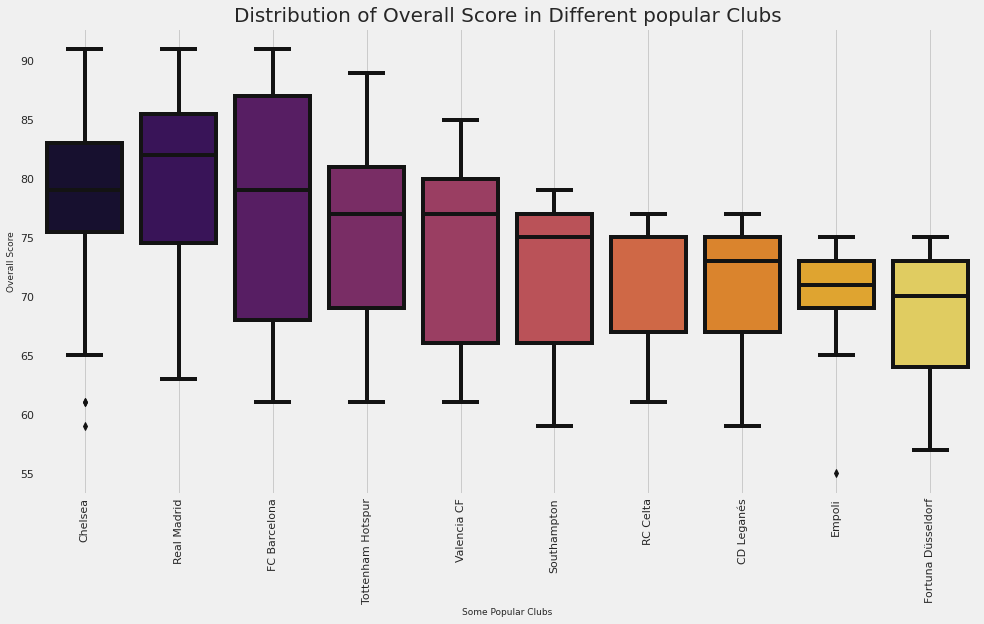

In [ ]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

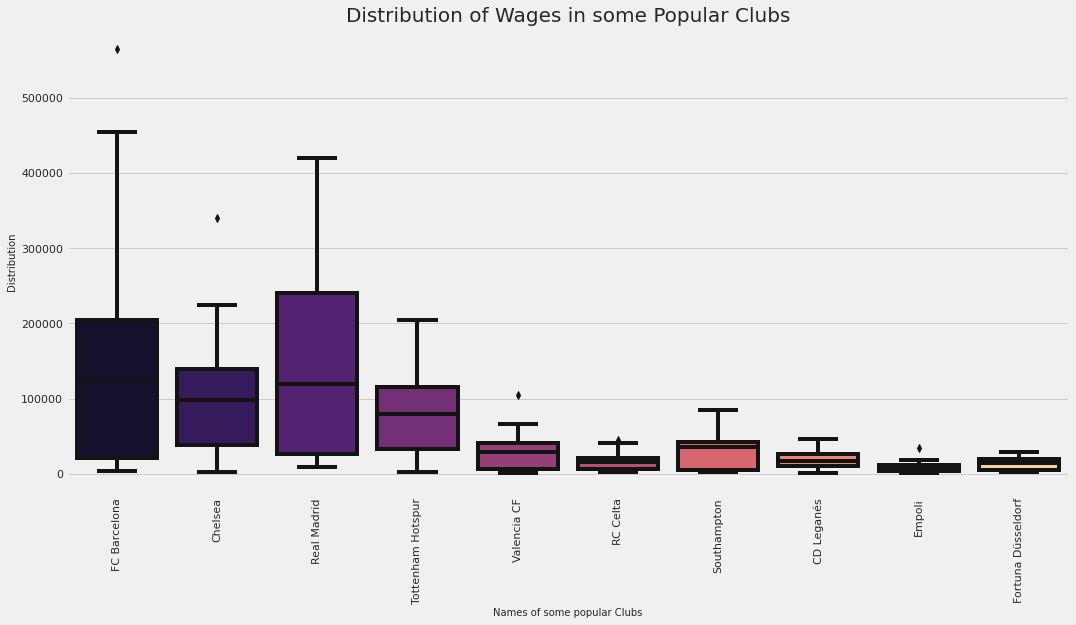

In [ ]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Distribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

# SCATTERPLOT
A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded, one additional variable can be displayed

Text(0, 0.5, 'Nationality')

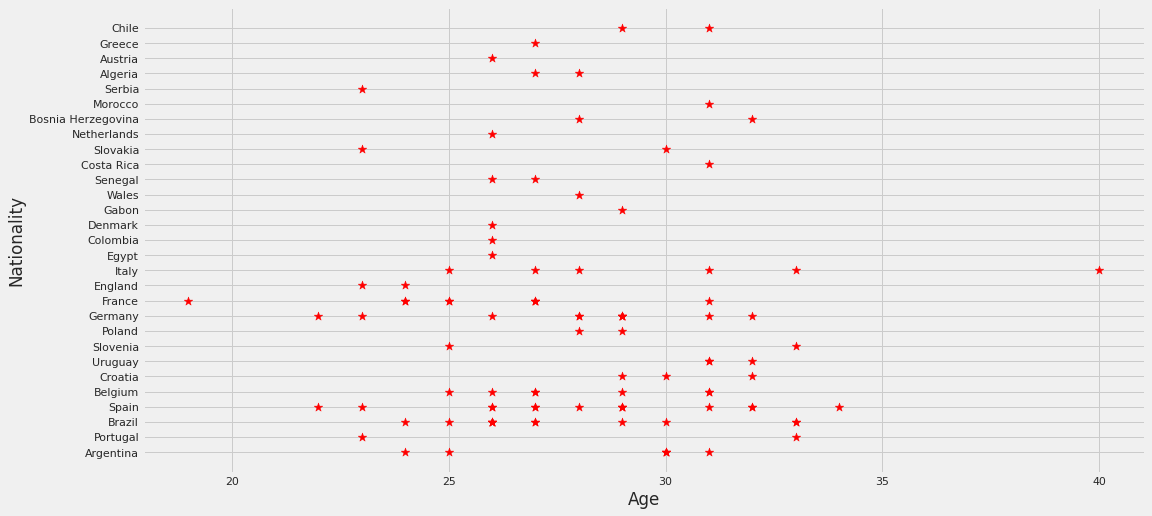

In [ ]:
plt.scatter(df_p['Age'],df_p['Nationality'],c ='red',label='TIME TABLE',marker='*',s=80)
plt.xlabel("Age")
plt.ylabel("Nationality")

Text(0, 0.5, 'Club')

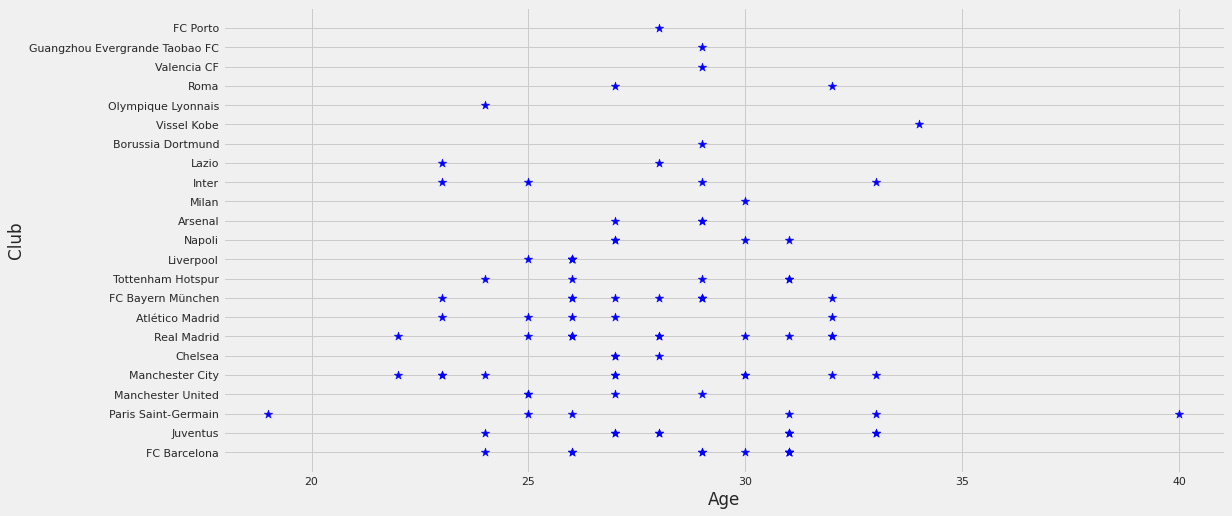

In [ ]:
plt.scatter(df_p['Age'],df_p['Club'],c ='blue',label='TIME TABLE',marker='*',s=80)
plt.xlabel("Age")
plt.ylabel("Club")

# VIOLIN PLOT
A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

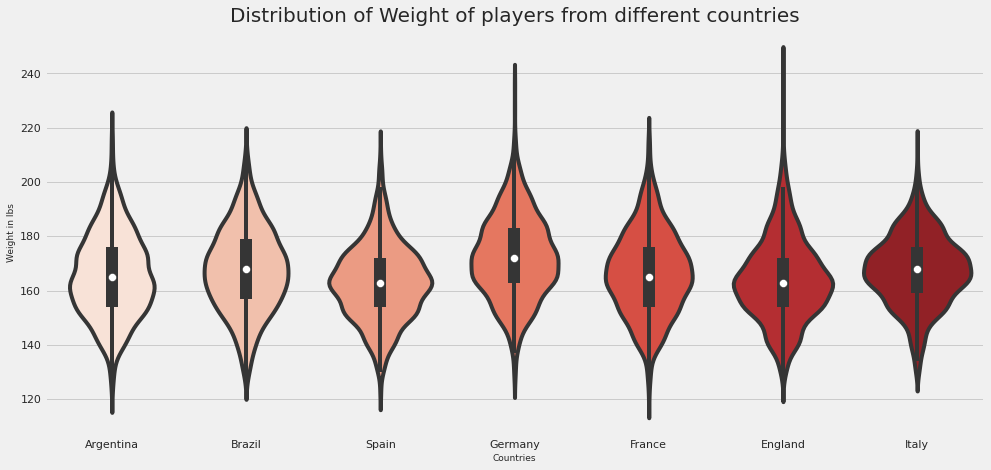

In [ ]:
# Every Nations' Player and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

# QUERY ANALYSIS

In [ ]:
#query analysis
# best players per each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club',
                             'Nationality','Overall']].sort_values(by = 'Overall',
                                     ascending = False).style.background_gradient(cmap = 'pink')

In [ ]:
# finding 15 youngest Players from the dataset

data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club',
                              'Nationality', 'Overall']].head(15).style.background_gradient(cmap = 'magma')

In [ ]:
# finding 15 eldest players from the dataset

data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club',
                              'Nationality', 'Overall']].head(15).style.background_gradient(cmap = 'Wistia')

In [ ]:
# finding 15 highest paid players from the dataset

data.sort_values('Wage', ascending = False)[['Name', 'Age', 'Club',
                              'Nationality', 'Overall']].head(15).style.background_gradient(cmap = 'Wistia')

In [ ]:
# Top 20 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
            ascending = False).head(20).style.background_gradient(cmap = 'bone')

In [ ]:
# Top 20 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
                    'Nationality', 'Overall']].sort_values(by = 'Overall',
                            ascending = False).head(20).style.background_gradient(cmap = 'copper')

In [ ]:
## Let's Analyze the Skills of Players

@interact
def skill(skills = ['Defending', 'General', 'Mental', 'Passing', 
                       'Mobility', 'Power', 'Rating','Shooting'], score = 75):
    return data[data[skills] > score][['Name', 'Nationality', 'Club', 'Overall', skills]].sort_values(by = skills,
                                    ascending = False).head(20).style.background_gradient(cmap = 'Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

In [ ]:
# lets make an interactive function for getting a report of the players country wise

# lets make a function to see the list of top 15 players from each country
@interact
def country(country = list(data['Nationality'].value_counts().index)):
    return data[data['Nationality'] == country][['Name','Position','Overall',
                    'Potential']].sort_values(by = 'Overall',
                            ascending = False).head(15).style.background_gradient(cmap = 'magma')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [ ]:
# lets make an interactive function to get the list of top 15 players from each of the club

# lets define a function 
@interact
def club(club = list(data['Club'].value_counts().index[1:])):
    return data[data['Club'] == club][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                     'Value','Contract Valid Until']].sort_values(by = 'Overall',
                                ascending  = False).head(15).style.background_gradient(cmap = 'inferno')

interactive(children=(Dropdown(description='club', options=('FC Barcelona', 'Burnley', 'AS Monaco', 'Everton',…

# ENCODING

In [ ]:
# Identify numeric features
data.select_dtypes(['float64','int64']).columns

Index(['Age', 'Overall', 'Potential', 'Wage', 'Special', 'Weak Foot',
       'Skill Moves', 'Jersey Number', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Defending', 'General',
       'Mental', 'Passing', 'Mobility', 'Power', 'Rating', 'Shooting'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

In [ ]:

data['Preferred Foot'] = le.fit_transform(data['Preferred Foot'])

In [ ]:
data['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [ ]:
data['Work Rate'] = le.fit_transform(data['Work Rate'])

In [ ]:
data['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [ ]:
data['Position'] = le.fit_transform(data['Position'])

In [ ]:
X=data[['Age', 'Potential', 'Special', 'Weak Foot', 'Skill Moves',
        'Preferred Foot','Work Rate','Position',
      
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power',
       'Shooting']]
Y=data["Overall"]

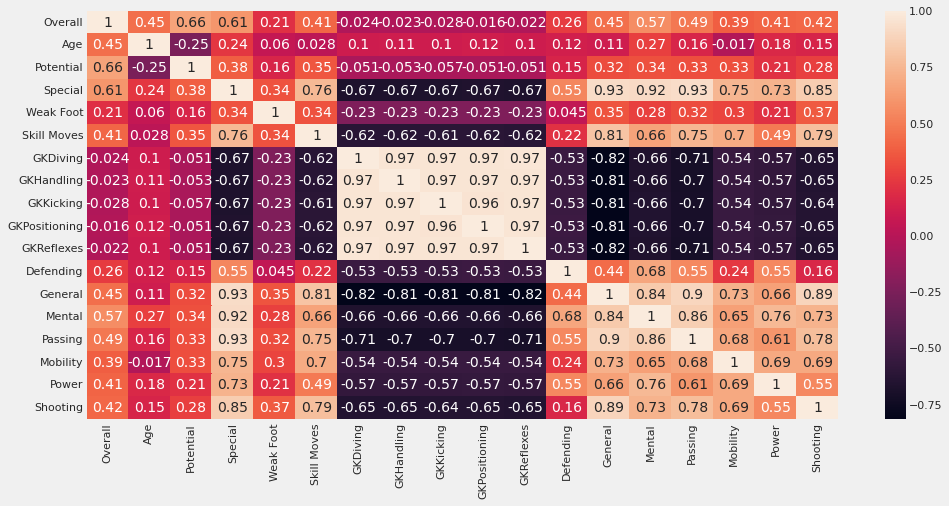

In [ ]:
sns.heatmap(df[['Overall','Age', 'Potential', 'Special', 'Weak Foot', 'Skill Moves',
        
      
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power',
       'Shooting','Preferred Foot','Work Rate','Position']].corr(), annot=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(51,'Score'))  

          Features          Score
2          Special  316531.952876
19        Shooting   19026.611908
16         Passing   18654.347360
15          Mental   18544.461004
14         General   17555.840697
13       Defending   12208.030366
17        Mobility    6016.802726
1        Potential    4602.081274
18           Power    4485.199025
0              Age    3842.146390
8         GKDiving    2563.200489
12      GKReflexes    2376.149488
9       GKHandling    2347.578045
10       GKKicking    2230.799126
11   GKPositioning    2000.369084
6        Work Rate    1507.878511
7         Position     906.441076
4      Skill Moves     792.156885
3        Weak Foot     128.991926
5   Preferred Foot      22.544086


By inspecting the heatmap and feature scores the features  'Age', 'Potential', 'Special',  'Skill Moves', 'Work Rate', 'Position', ’Weak Foot’, ‘Defending’,  'General', 'Mental', 'Passing', 'Mobility', 'Power', 'Shooting' are selected for predicting overall skill.

In [ ]:
y = data["Overall"]
x = data[['Age', 'Potential', 'Special',  'Skill Moves','Work Rate','Position','Defending','Weak Foot','General', 'Mental', 'Passing', 'Mobility', 'Power',
       'Shooting']]

# MODEL BUILDING

In [ ]:
# Splitting the data into a train set and a test set.
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42) 


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min=MinMaxScaler(feature_range=(0,1))
x=min.fit_transform(x)


In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
 

In [ ]:
lm.fit(xtrain,ytrain)
predict=lm.predict(xtest)
predict

array([70.01521864, 57.66912987, 63.74504334, ..., 66.19687815,
       62.83642773, 71.08634873])

In [ ]:
from sklearn.metrics import r2_score
#TEST ACCURACY
a = r2_score(ytest,predict)
a


0.8868328154542312

In [ ]:
#train accuracy
m=lm.predict(xtrain)
acc = r2_score(ytrain,m)
acc


0.8871308130473508

In [ ]:
#Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
p=1 - (1-a*(len(y)-1)/(len(y)-42-1))
p


0.8888834088394479

In [ ]:
from sklearn import metrics

eval_1 = {
    'MAE': metrics.mean_absolute_error(ytest, predict),
    'MSE': metrics.mean_squared_error(ytest, predict),
    'RMSE': np.sqrt(metrics.mean_squared_error(ytest, predict))
}
eval_1

{'MAE': 1.8126835664999754, 'MSE': 5.2631357760395, 'RMSE': 2.294152518042229}

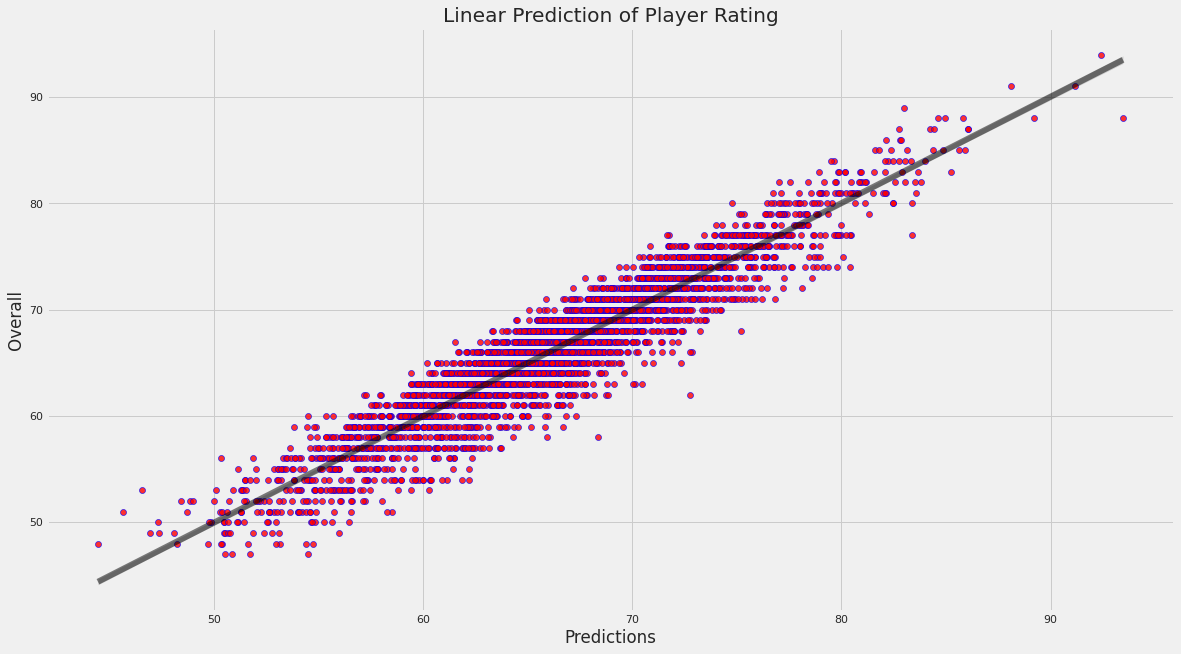

In [ ]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(predict ,ytest,scatter_kws={'color':'red','edgecolor':'blue','linewidth': 0.7 },line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()


In [ ]:
x.shape[1]

14

In [ ]:
#lasso
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(xtrain,ytrain)

Lasso()

In [ ]:
pred= model.predict(xtest)
pred

array([69.42711835, 58.12149464, 63.38390665, ..., 66.26512205,
       63.31603937, 70.83469929])

In [ ]:
b = r2_score(ytest,pred)
b

0.8823915353887196

In [ ]:
q=1-(1-b*(len(y)-1)/(len(y)-x.shape[1]-1))
q

0.8830705965966925

In [ ]:
#Ridge
from sklearn.linear_model import Ridge
modelr=Ridge()
modelr.fit(xtrain,ytrain)
predr=modelr.predict(xtest)
predr

array([70.01528462, 57.66918984, 63.74502842, ..., 66.1969569 ,
       62.83651928, 71.0862884 ])

In [ ]:
c=r2_score(ytest,predr)
c

0.8868327859260376

In [ ]:
r=1-(1-c*(len(y)-1)/(len(y)-x.shape[1]-1))
r

0.8875152649829289

In [ ]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor
modeld=DecisionTreeRegressor()
modeld.fit(xtrain,ytrain)
predd=modeld.predict(xtest)
predd

array([73., 60., 63., ..., 64., 64., 72.])

In [ ]:
d=r2_score(ytest,predd)
d

0.9386116714103738

In [ ]:
s=1-(1-d*(len(y)-1)/(len(y)-x.shape[1]-1))
s

0.9393339978945286

In [ ]:
#svm
from sklearn.svm import SVR
models=SVR()
models.fit(xtrain,ytrain)
preds=models.predict(xtest)
preds

array([60.17459624, 61.08689842, 59.89084632, ..., 63.91917359,
       66.87969661, 71.27013011])

In [ ]:
e=r2_score(ytest,preds)
e

0.48379826968633055

In [ ]:
t=1-(1-e*(len(y)-1)/(len(y)-x.shape[1]-1))
t

0.4841705858569335

In [ ]:
#random forest 
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(xtrain,ytrain)
pred1 = model1.predict(xtest)
pred1

array([71.05, 60.5 , 64.99, ..., 64.  , 63.9 , 72.  ])

In [ ]:
f=r2_score(ytest,pred1)
f

0.9710003932709466

In [ ]:
u=1-(1-f*(len(y)-1)/(len(y)-x.shape[1]-1))
u

0.9717476451127337

In [ ]:
#bagging 
from sklearn.ensemble import BaggingRegressor
modelb=BaggingRegressor()
modelb.fit(xtrain,ytrain)
predb=modelb.predict(xtest)
predb

array([70.5, 60.4, 65.7, ..., 64. , 63.8, 72. ])

In [ ]:
g=r2_score(ytest,predb)
g

0.9676385858500502

In [ ]:
v=1-(1-g*(len(y)-1)/(len(y)-x.shape[1]-1))

In [ ]:
#adaboost
from sklearn.ensemble import AdaBoostRegressor
modela=AdaBoostRegressor()
modela.fit(xtrain,ytrain)
preda=modela.predict(xtest)
preda

array([71.08461538, 58.41709845, 64.0690948 , ..., 60.36546185,
       61.45221445, 68.71316557])

In [ ]:
h=r2_score(ytest,preda)
h

0.8667240102459992

In [ ]:
w=1-(1-h*(len(y)-1)/(len(y)-x.shape[1]-1))

In [ ]:
#gradient boosting 
from sklearn.ensemble import GradientBoostingRegressor
modelg=GradientBoostingRegressor()
modelg.fit(xtrain,ytrain)
predg=modelg.predict(xtest)
predg 


array([70.80967893, 60.46308372, 66.95219215, ..., 64.00818523,
       63.70683073, 71.61636213])

In [ ]:
i=r2_score(ytest,predg )
i

0.9638834625198289

In [ ]:
z=1-(1-i*(len(y)-1)/(len(y)-x.shape[1]-1))
z

0.9646252373920406

In [ ]:
#xgb
from xgboost import XGBRegressor
modelxgb = XGBRegressor() 
modelxgb.fit(xtrain,ytrain)
predxgb = modelxgb.predict(xtest)
predxgb

[09:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([71.397385, 60.409748, 66.84355 , ..., 64.26802 , 63.61242 ,
       71.26098 ], dtype=float32)

In [ ]:
j=r2_score(ytest,predxgb)
j

0.963458659823241

In [ ]:
k=1-(1-j*(len(y)-1)/(len(y)-x.shape[1]-1))

In [ ]:
models=pd.DataFrame({'Model':['LinearRegression','Lasso','Ridge','DesicionTreeRegressor','SVR','RandomForestRegressor','BaggingRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor'],'R2_score':[a,b,c,d,e,f,g,h,i,j],'Adj_R2_score':[p,q,r,s,t,u,v,w,z,k]})
models.sort_values(by='Adj_R2_score',ascending=False)

Model  R2_score  Adj_R2_score
5      RandomForestRegressor  0.971000      0.971748
6           BaggingRegressor  0.967639      0.968383
8  GradientBoostingRegressor  0.963883      0.964625
9               XGBRegressor  0.963459      0.964200
3      DesicionTreeRegressor  0.938612      0.939334
0           LinearRegression  0.886833      0.888883
2                      Ridge  0.886833      0.887515
1                      Lasso  0.882392      0.883071
7          AdaBoostRegressor  0.866724      0.867391
4                        SVR  0.483798      0.484171

# CONCLUSION

RandomForest seems to have highest accuracy but it has accuracy 97 which seems to be overfitted . Therefore we can select Decision Tree Regressor or Linear,Lasso or Ridge to predict the overall score of a player on the basis of their performance attributes.

**Finding World's best PLAYER X1**


In [ ]:
#weights
a = 0.5
b = 1
c= 2
d = 3
 
#GoalKeeping Characterstics
df['gk_Shot_Stopper'] = (b*df.Reactions + b*df.Composure + a*df.SprintSpeed + a*df.Strength + c*df.Jumping + b*df.GKPositioning + c*df.GKDiving + d*df.GKReflexes + b*df.GKHandling)/(2*a + 4*b + 2*c + 1*d)
df['gk_Sweeper'] = (b*df.Reactions + b*df.Composure + b*df.SprintSpeed + a*df.ShortPassing + a*df.LongPassing + b*df.Jumping + b*df.GKPositioning + b*df.GKDiving + d*df.GKReflexes + b*df.GKHandling + d*df.GKKicking + c*df.Vision)/(2*a + 4*b + 3*c + 2*d)


Text(0, 0.5, 'Shot Stopping Score')

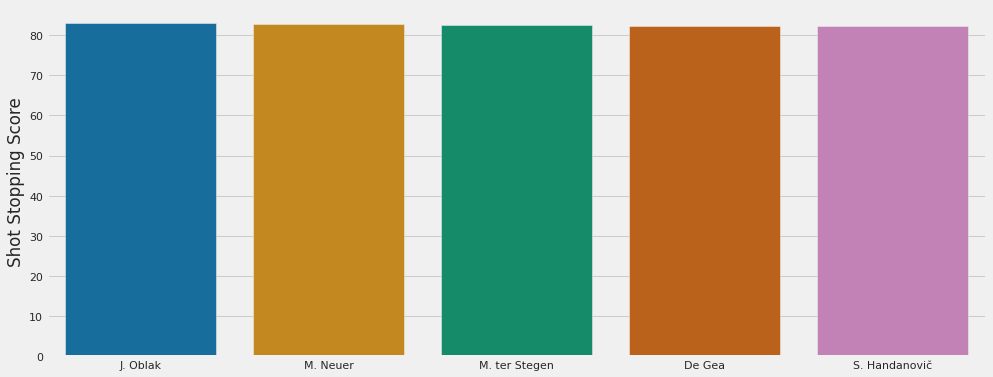

In [ ]:
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")

Text(0, 0.5, 'Sweeping Score')

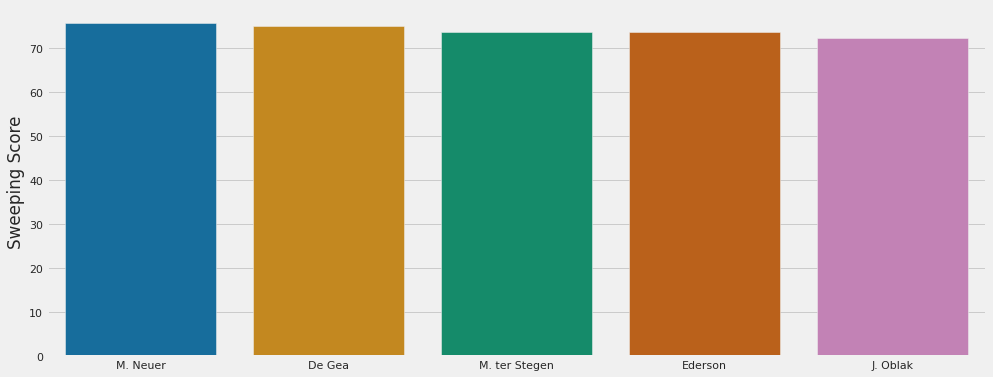

In [ ]:
plt.figure(figsize=(15,6))
sd = df.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("Sweeping Score")


In [ ]:
#Choosing Defenders
df['df_centre_backs'] = ( d*df.Reactions + c*df.Interceptions + d*df.SlidingTackle + d*df.StandingTackle + b*df.Vision+ b*df.Composure + b*df.Crossing +a*df.ShortPassing + b*df.LongPassing+ c*df.Acceleration + b*df.SprintSpeed
+ d*df.Stamina + d*df.Jumping + d*df.HeadingAccuracy + b*df.LongShots + d*df.Marking + c*df.Aggression)/(6*b + 3*c + 7*d)
df['df_wb_Wing_Backs'] = (b*df.BallControl + a*df.Dribbling + a*df.Marking + d*df.SlidingTackle + d*df.StandingTackle  + c*df.Vision + c*df.Crossing + b*df.ShortPassing + c*df.LongPassing + d*df.Acceleration +d*df.SprintSpeed + c*df.Stamina + a*df.Finishing)/(4*a + 2*b + 4*c + 4*d)


Text(0, 0.5, 'LCB Score')

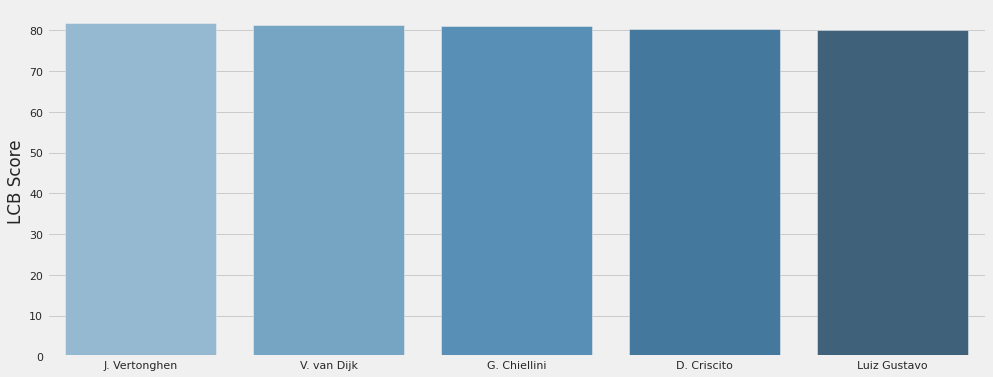

In [ ]:
plt.figure(figsize=(15,6))
sd = df[(df['Position'] == 'LCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score")

Text(0, 0.5, 'RCB Score')

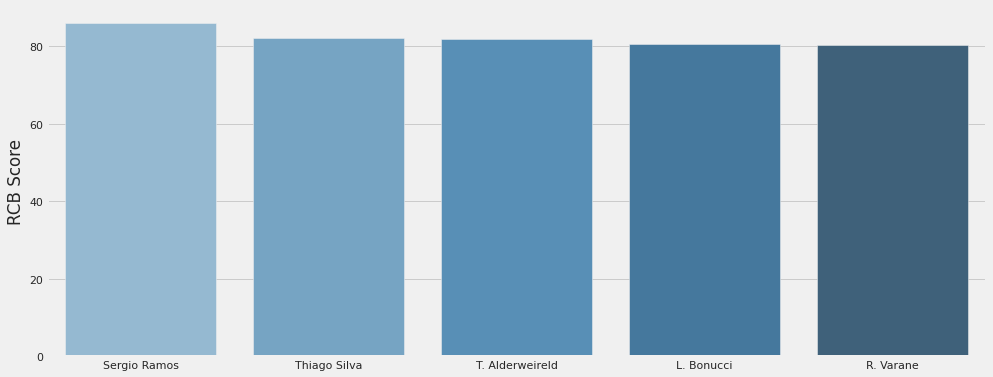

In [ ]:
plt.figure(figsize=(15,6))
 
sd = df[(df['Position'] == 'RCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("RCB Score")


Text(0, 0.5, 'Left Back Score')

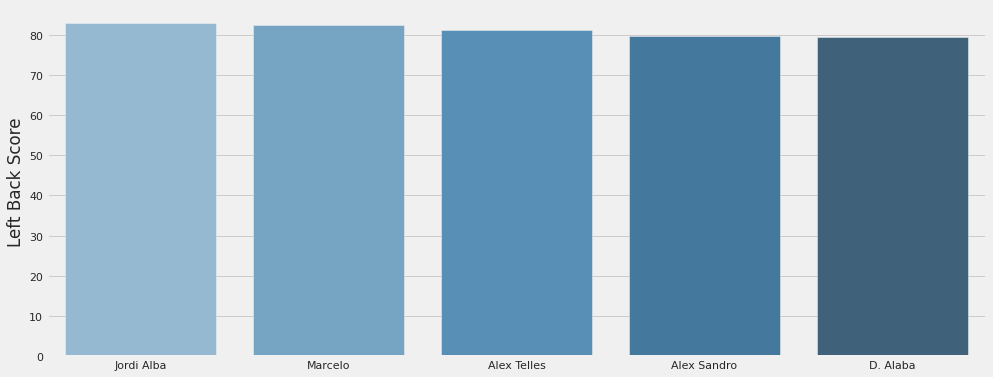

In [ ]:
plt.figure(figsize=(15,6))
 
sd = df[(df['Position'] == 'LWB') | (df['Position'] == 'LB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x4 = np.array(list(sd['Name']))
y4 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x4, y4, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Back Score")


Text(0, 0.5, 'Right Back Score')

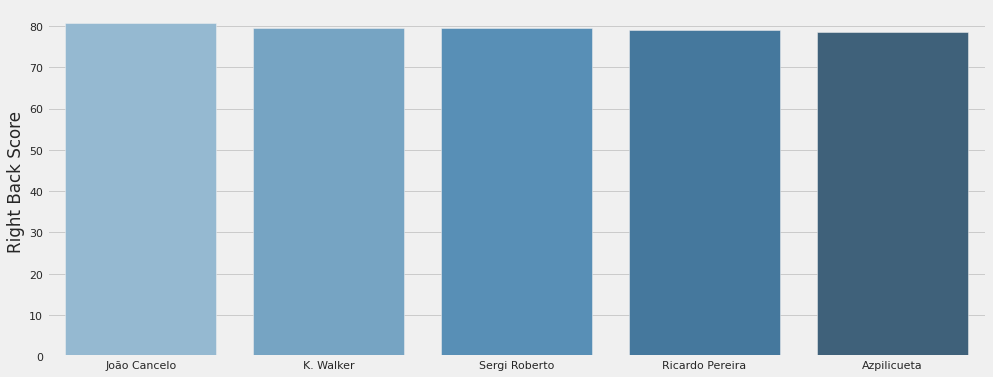

In [ ]:
plt.figure(figsize=(15,6))
sd = df[(df['Position'] == 'RWB') | (df['Position'] == 'RB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x5 = np.array(list(sd['Name']))
y5 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x5, y5, palette=sns.color_palette("Blues_d"))
plt.ylabel("Right Back Score")

In [ ]:
#Midfielding Indices
df['mf_playmaker'] = (d*df.BallControl + d*df.Dribbling + a*df.Marking + d*df.Reactions + d*df.Vision   + c*df.Crossing + d*df.ShortPassing + c*df.LongPassing  + c*df.Curve + b*df.LongShots + c*df.FKAccuracy)/(1*a + 1*b + 4*c + 4*d)
df['mf_beast'] = (d*df.Agility + c*df.Balance + b*df.Jumping + c*df.Strength + d*df.Stamina + a*df.SprintSpeed + c*df.Acceleration + d*df.ShortPassing + c*df.Aggression + d*df.Reactions + b*df.Marking + b*df.StandingTackle + b*df.SlidingTackle + b*df.Interceptions)/(1*a + 5*b + 4*c + 4*d)
df['mf_controller'] = (b*df["Weak Foot" ]+d*df.BallControl + a*df.Dribbling + a*df.Marking + a*df.Reactions + c*df.Vision + c*df.Composure + d*df.ShortPassing + d*df.LongPassing)/(2*c + 3*d + 4*a)


Text(0, 0.5, 'PlayMaker Score')

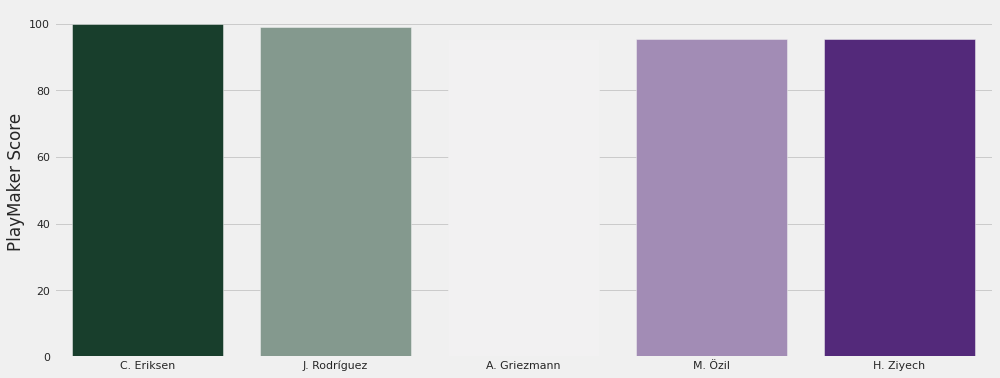

In [ ]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Position'] == 'CAM') | (df['Position'] == 'LAM') | (df['Position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")

Text(0, 0.5, 'Beast Score')

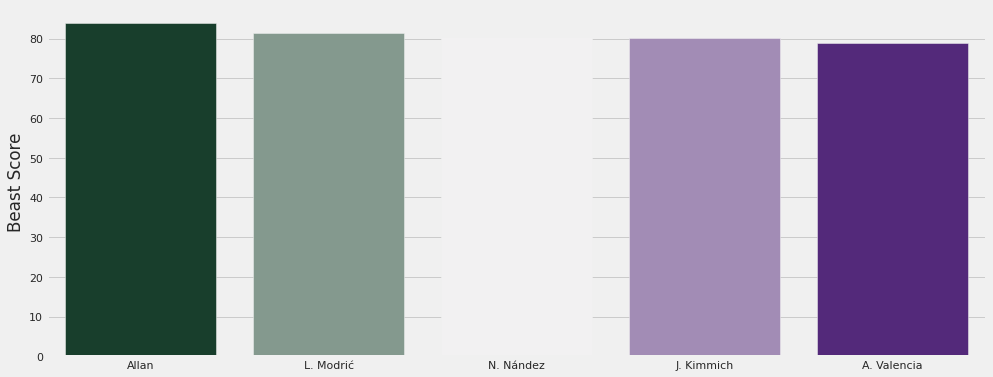

In [ ]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Position'] == 'RCM') | (df['Position'] == 'RM')].sort_values('mf_beast', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['mf_beast']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Beast Score")

Text(0, 0.5, 'Controller Score')

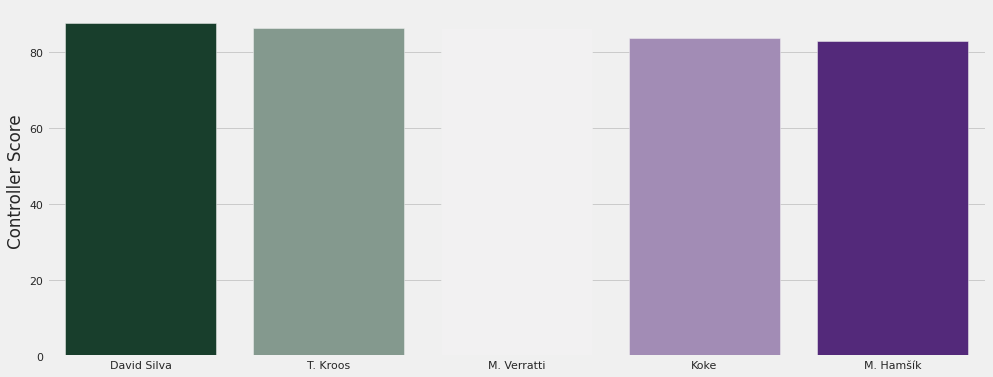

In [ ]:
plt.figure(figsize=(15,6))
 
# Generate some sequential data
ss = df[(df['Position'] == 'LCM') | (df['Position'] == 'LM')].sort_values('mf_controller', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Controller Score")

In [ ]:
#Attackers
df['att_left_wing'] = (c*df["Weak Foot" ] + c*df.BallControl + c*df.Dribbling + c*df.SprintSpeed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.ShortPassing  + b*df.LongPassing  + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.LongShots + b*df.FKAccuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_right_wing'] = (c*df["Weak Foot" ]+ c*df.BallControl + c*df.Dribbling + c*df.SprintSpeed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.ShortPassing + b*df.LongPassing + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.LongShots + b*df.FKAccuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_striker'] = (b*df["Weak Foot" ] + b*df.BallControl + a*df.Vision + b*df.Aggression + b*df.Agility + a*df.Curve + a*df.LongShots + d*df.Balance + d*df.Finishing + d*df.HeadingAccuracy + c*df.Jumping + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)


Text(0, 0.5, 'Left Wing')

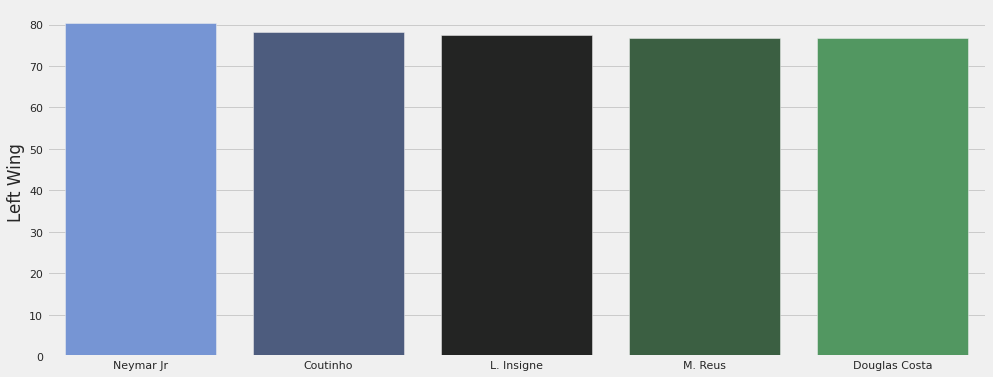

In [ ]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Position'] == 'LW') | (df['Position'] == 'LM') | (df['Position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Left Wing")


Text(0, 0.5, 'Right Wing')

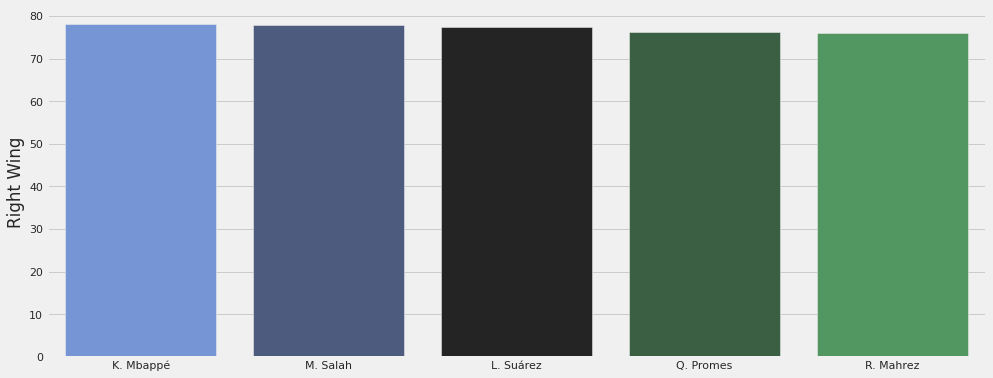

In [ ]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Position'] == 'RW') | (df['Position'] == 'RM') | (df['Position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['att_right_wing']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Right Wing")


Text(0, 0.5, 'Striker')

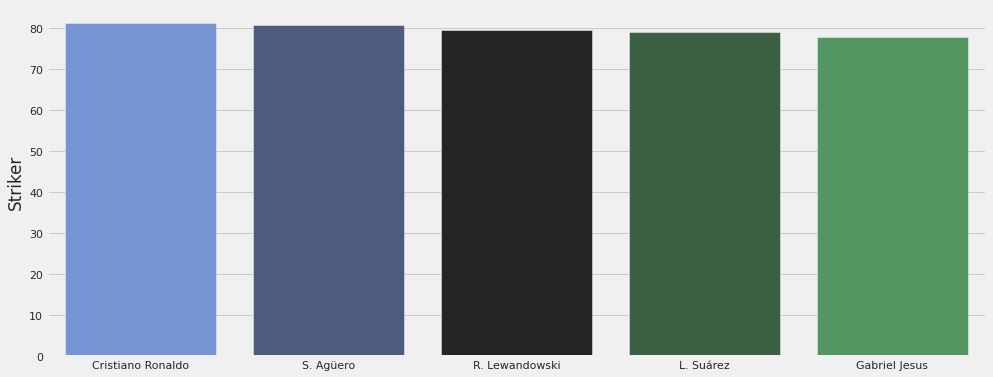

In [ ]:
plt.figure(figsize=(15,6))
ss = df[(df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'RS') | (df['Position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['att_striker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Striker")

**Best playing 11 selected by the analysis**

**GOAL KEEPER**

SHOT STOPPER ,SWEEPER	

MANUEL NEUER
	



**DEFENDERS**

CENTRAL DEFENDER	
J. VERTONGHEN
	
RIGHT CENTRAL DEFENDER	
SERGIO RAMOS
	
LWB/LB DEFENDER	
JORDI ALBA
	
RWB/RB DEFENDER	
JOAO CANCELO



**MIDFIELDERS**	

PLAYMAKER	
C. ERIKSEN
	
RIGHT CENTRAL MIDFIELDER	
ALLAN
	
LEFT CENTRAL MIDFIELDER	
DAVID SILVA



**ATTACKERS**	

LEFT WING ATTACKER	
NEYMAR Jr
	
RIGHT WING ATTACKER	
K. MBAPPE
	
STRIKER	
CRISTIANO RONALDO
